In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Ridolfi_Dataset

In [3]:
rid_df=pd.read_excel('Ridolfi_Calibration_Dataset.xlsx', sheet_name='Sheet1')

In [4]:
rid_df['Reference'].unique()

array(['Adam & Green (1994)', 'Gardner et al. (1995)',
       'Moore & Carmichael (1998)', 'Martel et al. (1999)',
       'Scailet & Evans (1999)', 'Dalpè & Baker (2000)',
       'Kaszuba & Wendlandt (2000)', 'Phichavant et al. (2002)',
       'Rutherford & Devine (2003)', 'Costa et al. (2004)',
       'Nekvasil (2004)', 'Sato et al. (2005)', 'Caricchi et al. (2006)',
       'Adam et al. (2007)', 'Mc Canta et al. (2007)',
       'Irving & Green (2008)', 'Rutherford & Devine (2008)',
       'Mercer & Johnston (2008)', 'Freise et al. (2009)',
       'Pietranik et al. (2009)', 'Pilet et al. (2010)',
       'Krawczynski et al. (2012)', 'Blatter et al. (2013)',
       'Almeev et al. (2013)', 'Andujar et al. (2015)',
       'Riker et al. (2015)', 'Iacovino et al. (2016)',
       'Ulmer et al. (2018)'], dtype=object)

In [5]:
# No aam and green in my dataset
# No gardner
# Moore yes
# Martel yes
# Scailet No
# Dalpe No
# Kaszuba no
# Pichavent yes
# RD No
# Costa 2004 yes
# Neksavil No
# Sato No
# Carrichi No
# Adam No
# McCanta 2007 no
# Irving No
# RD2008 no
# Mercer yes
# Freise No
# Pietranik
# Pilet 
# Kraw yes
# Blatter yes
# Almeev yes 
# Andu yes
# Riker  eys
#IAcovino  no
# ulmer yes

In [6]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_Sept2022.xlsx', sheet_name='Amp-Liq')
myAmps1=out['Amps']
myLiquids1=out['Liqs']
Amp_Glass=out['my_input']

## Checking they are amphiboles

In [7]:
Class=pt.classify_phases(df=myAmps1, str_to_drop="_Amp")
Class['Phase_Min_Group_ML'].unique()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refe

array(['Amp'], dtype=object)

In [8]:
InRidolfi=(
(Amp_Glass['Citation_x'].str.startswith('Moore, G., and Carmichael, I.S.E. (1998)'))
)
sum(InRidolfi)


10

In [9]:

Mgno_hyd=pt.calculate_amp_liq_mgno_hyd(liq_comps=myLiquids1, amp_comps=Amp_Glass)
Mgno_anhyd=pt.calculate_amp_liq_mgno_anhyd(liq_comps=myLiquids1, amp_comps=Amp_Glass)

notinLEPR= Amp_Glass['Citation_x'].str.startswith('notinLEPR')
notinKeith=(Amp_Glass['Citation_x'].str.startswith('Mercer, C.N., and Johnston, A.D. (2008)'))|(Amp_Glass['Citation_x'].str.startswith('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
InRidolfi=(
(Amp_Glass['Citation_x'].str.startswith('Moore, G., and Carmichael, I.S.E. (1998) The hydrous phase equilibria (to 3 kbar) of an andesite and basaltic andesite from western Mexico: constraints on water content and conditions of phenocryst growth. Contributions to Mineralogy and Petrology 130 304-319. 10.1007/s004100050367'))
|
(Amp_Glass['Citation_x'].str.startswith('Martel, C., Pichavant, M., Holtz, F., Scaillet, B., Bourdier, J., Traineau, H. (1999) Effects of fO2 and H2O on andesite phase relations between 2 and 4 kbar. Journal of Geophysical Research'))
|
(Amp_Glass['Citation_x'].str.startswith('Pichavant, M., Martel, C., Bourdier, J.-L., Scaillet, B. (2002) Physical conditions, structure, and dynamics of a zoned magma chamber: Mount Pelée (Martinique, Lesser Antilles Arc). Journal'))
|
(Amp_Glass['Citation_x'].str.startswith('Costa2004_notinLEPR')) 
|
(Amp_Glass['Citation_x'].str.startswith('Mercer, C.N., and Johnston, A.D. (2008) Experimental studies of the P-T-H2O near-liquidus phase relations of basaltic andesite from North Sister Volcano, High Oregon Cascades:')) 
|
(Amp_Glass['Citation_x'].str.startswith('Kraw2013_notinLEPR')) 
 |
 (Amp_Glass['Citation_x'].str.startswith('Blatter2013_notinLEPR')) 
 |
 (Amp_Glass['Citation_x'].str.startswith('Almeev2013_notinLEPR')) 
  |
 (Amp_Glass['Citation_x'].str.startswith('Andujar2015_notinLEPR')) 
   |
 (Amp_Glass['Citation_x'].str.startswith('Riker2015_notinLEPR'))
    |
 (Amp_Glass['Citation_x'].str.startswith('Ulmer2018_notinLEPR')) 
)

    
    

newMask=~InRidolfi
newMask=newMask.fillna(False)
Eq_mask=abs(0.28-Mgno_anhyd)<0.11
mask_1GPa=Amp_Glass['P_kbar_x']<15
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

Amp_Glass_Filt=Amp_Glass.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)
myAmps_filt=myAmps1.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)
Amp_Glass_filt=Amp_Glass.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)

In [10]:
Amp_Glass_filt['Citation_x'].unique()

array(['Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8',
       'Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225',
       'Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Carmichael, I.S.E. (2004) A hornblende basalt from western Mexico: water-saturated phase relations constrain a pressure-temperature window of eruptibility. Journal of Petrology 45 485-506. 10.1093/petrology/egg091',
       'Barclay, J., Rutherford, M.J., Carroll, M.R

## Amphibole-only temperatures using Ridolfi (2012)

In [20]:
len(Amp_Glass_filt)

175

In [11]:
Press_Ridolfi12=pt.calculate_amp_only_press_temp(amp_comps=myAmps_filt, equationT="T_Ridolfi2012", equationP="P_Ridolfi2021")
Press_Ridolfi12_Filt=Press_Ridolfi12.loc[Press_Ridolfi12['Input_Check']==True].reset_index(drop=True)
Amp_Glass_filt2=Amp_Glass_filt.loc[Press_Ridolfi12['Input_Check']==True].reset_index(drop=True)
Amp_filt2=myAmps_filt.loc[Press_Ridolfi12['Input_Check']==True].reset_index(drop=True)
highNa=Press_Ridolfi12.loc[Press_Ridolfi12['Na2O_Amp']>2]
highNa.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,P_kbar_calc,T_K_calc,Input_Check,Fail Msg,classification,equation,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
2,10.638413,1238.489363,True,,Tschermakitic pargasite,1a,41.000000,1.51,15.1,13.800000,0.36,11.6,10.8,2.13,0.78,0.0,0.0,0.0,2
3,5.571807,1168.823305,True,,Tschermakitic pargasite,1c,40.700001,1.65,15.0,16.500000,0.25,10.1,10.5,2.08,0.70,0.0,0.0,0.0,3
4,9.155872,1196.205134,True,,Mg-hastingsite,1d,40.500000,1.31,15.2,16.799999,0.35,9.4,10.9,2.22,0.82,0.0,0.0,0.0,4
5,6.666863,1272.244971,True,,Tschermakitic pargasite,1a,42.500000,2.92,12.5,12.500000,0.40,13.2,10.5,2.24,0.51,0.0,0.0,0.0,5
9,5.372721,1191.593061,True,,Tschermakitic pargasite,1c,41.400002,1.97,14.1,16.900000,0.41,10.1,10.0,2.09,0.57,0.0,0.0,0.0,9


In [12]:
Press_Ridolfi12.loc[Press_Ridolfi12['Input_Check']]
                    

,P_kbar_calc,T_K_calc,Input_Check,Fail Msg,classification,equation,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,6.579204,1180.771030,True,,Tschermakitic pargasite,1c,40.000000,1.85,16.00,15.500000,0.37,9.48,10.60,1.90,0.82,0.0,0.0,0.0,0
1,4.965809,1149.929754,True,,Tschermakitic pargasite,1c,41.400002,1.67,13.60,18.100000,0.49,8.48,10.40,1.73,0.69,0.0,0.0,0.0,1
2,10.638413,1238.489363,True,,Tschermakitic pargasite,1a,41.000000,1.51,15.10,13.800000,0.36,11.60,10.80,2.13,0.78,0.0,0.0,0.0,2
3,5.571807,1168.823305,True,,Tschermakitic pargasite,1c,40.700001,1.65,15.00,16.500000,0.25,10.10,10.50,2.08,0.70,0.0,0.0,0.0,3
4,9.155872,1196.205134,True,,Mg-hastingsite,1d,40.500000,1.31,15.20,16.799999,0.35,9.40,10.90,2.22,0.82,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.315465,1119.477995,True,,Mg-Hornblende,1b,46.870000,1.16,9.75,13.310000,0.38,14.04,10.63,1.48,0.30,0.0,0.0,0.0,260
168,2.614197,1133.817556,True,,Mg-Hornblende,1b,45.190000,0.95,10.29,12.300000,0.43,14.55,11.45,1.35,0.36,0.0,0.0,0.0,262
170,3.115449,1147.616768,True,,Mg-Hornblende,1b,45.680000,1.02,10.80,10.890000,0.47,14.74,11.32,1.20,0.28,0.0,0.0,0.0,264
171,1.952661,1100.791858,True,,Mg-Hornblende,1b,46.190000,0.77,9.13,13.020000,0.48,14.25,11.66,1.21,0.31,0.0,0.0,0.0,265


In [13]:
Calc_Comp=pt.calculate_amp_only_melt_comps(amp_comps=Amp_filt2, T=Press_Ridolfi12_Filt['T_K_calc'])
Calc_Comp.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users

,SiO2_Eq10_Put2016,SiO2_Eq1_Zhang17,SiO2_Eq2_Zhang17,SiO2_Eq4_Zhang17,TiO2_Eq6_Zhang17,SiO2_Eq3_Zhang17,FeO_Eq7_Zhang17,TiO2_Eq5_Zhang17,MgO_Eq9_Zhang17,CaO_Eq10_Zhang17,CaO_Eq11_Zhang17,K2O_Eq12_Zhang17,K2O_Eq13_Zhang17,Al2O3_Eq14_Zhang17,H2O_Ridolfi21,deltaNNO_Ridolfi21,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A,Ca_A,Sum_T,Sum_C,Sum_B,Sum_A,factor_8SiAl,factor_15eK,factor_13eCNK,All ferric,8Si_Min,16CAT_Min,15eNK_Min,Min_MinFactor,Min_factor,Max_factor,Av_factor,Si_T_ideal,Al_IV_T_ideal,Ti_T_ideal,Al_VI_C_ideal,Ti_C_ideal,Cr_C_ideal,Fe3_C_ideal,Mg_C_ideal,Fe2_C_ideal,Mn_C_ideal,Mg_B_ideal,Fe2_B_ideal,Mn_B_ideal,Ca_B_ideal,Na_B_ideal,Na_A_ideal,K_A_ideal,FeO_Eq8_Zhang17
0,56.435174,61.236701,60.727906,60.925019,0.608250,60.586833,5.554169,0.569555,1.565858,4.847865,6.355710,1.816137,1.935754,18.449760,9.709549,0.355429,6.044696,2.135656,1.958854,1.716301,2.849649,0.556692,0.158084,0.047359,0.210289,0.0,0.0,13.246502,14.962803,15.677579,0.521590,6.044696,1.955304,0.894345,0.210289,2.135656,1.759711,0.0,0.0,0.0,0.199143,0.047359,0.037197,1.716301,0.519496,0.158084,0,8.0,4.789711,2.000000,0.677579,0.899448,0.966526,0.868821,0.959156,1.323474,1.020566,1.002486,1.002486,1.000000,0.966526,0.983263,5.943526,2.056474,0,0.745481,0.206769,0.0,0.769896,2.099912,1.156173,0.021769,0,0.000000,0.024797,1.687576,0.287627,0.259748,0.155438,5.721664
1,61.718133,69.506323,69.221287,69.973091,0.282336,69.204711,3.107700,0.279024,0.519390,2.276887,3.434944,2.870686,2.701150,16.731652,8.604308,-1.031709,6.313942,1.927989,2.308526,1.699443,2.444534,0.511556,0.134248,0.063297,0.191578,0.0,0.0,13.249867,14.949310,15.595115,0.455088,6.313942,1.686058,0.758476,0.191578,1.927989,2.121956,0.0,0.0,0.0,0.186570,0.063297,0.050690,1.699443,0.460867,0.134248,0,8.0,4.808422,2.000000,0.595115,0.913401,0.970191,0.869605,0.952213,1.267037,1.025962,1.003391,1.003391,1.000000,0.970191,0.985096,6.219837,1.780163,0,0.627937,0.188723,0.0,0.685598,1.899254,1.588522,0.009966,0,0.000000,0.052387,1.674114,0.273499,0.230433,0.132247,3.033513
2,53.460166,59.715070,59.920160,59.478316,0.627664,59.702967,5.872873,0.576948,2.000299,5.604442,6.623771,1.566343,1.557258,18.566151,8.563809,1.808419,6.113888,2.578696,1.720952,1.725562,2.653796,0.615829,0.148384,0.045470,0.169371,0.0,0.0,13.282174,15.007736,15.771949,0.599746,6.113888,1.886112,0.767684,0.169371,2.578696,1.484248,0.0,0.0,0.0,0.236704,0.045470,0.000000,1.725562,0.615829,0.148384,0,8.0,4.830629,2.007736,0.764213,0.912442,0.960088,0.866220,0.963937,1.308496,1.014459,0.999485,0.999485,0.999485,0.963937,0.981711,6.002071,1.997929,0,0.607331,0.166274,0.0,0.841300,2.531534,0.848177,0.005384,0,0.000000,0.039254,1.694003,0.266743,0.337824,0.145670,5.872715
3,58.921304,62.697113,62.268018,61.408440,0.486288,60.915936,5.705945,0.487447,1.364559,4.717520,5.317435,1.720923,1.928672,18.297913,9.545478,0.748906,6.111089,2.260758,2.071878,1.689222,2.654437,0.605529,0.134085,0.031794,0.186354,0.0,0.0,13.316310,15.005532,15.745146,0.521797,6.111089,1.888911,0.765526,0.186354,2.260758,1.787362,0.0,0.0,0.0,0.284516,0.031794,0.000000,1.689222,0.605529,0.134085,0,8.0,4.813646,2.005532,0.739614,0.912666,0.960857,0.866347,0.956900,1.309096,1.016186,0.999631,0.999631,0.999631,0.960857,0.980244,5.990360,2.009640,0,0.592357,0.182672,0.0,0.908763,2.216095,1.100112,0.000000,0,0.022071,0.031166,1.655850,0.290913,0.302653,0.131436,5.644393
4,56.749568,63.374695,63.952458,62.193856,0.350798,62.006177,4.909887,0.336973,1.205169,3.960424,5.092293,1.978299,1.984149,18.729270,10.720745,1.085528,6.105974,2.112692,2.118191,1.760757,2.700850,0.648933,0.157715,0.044694,0.148560,0.0,0.0,13.230961,14.991718,15.798366,0.499350,6.105974,1.894026,0.806823,0.148560,2.112692,1.931925,0.0,0.0,0.0,0.186

In [14]:
Amp_Glass_filt2.columns

Index(['Unnamed: 0', 'index', 'Citation_x', 'Experiment', 'SiO2_Amp',
       'TiO2_Amp', 'Al2O3_Amp', 'FeOt_Amp', 'MnO_Amp', 'MgO_Amp', 'CaO_Amp',
       'Na2O_Amp', 'K2O_Amp', 'Cr2O3_Amp', 'P2O5_Amp', 'T_K_x', 'P_kbar_x',
       'Duration', 'Laboratory', 'N_meas_Amp', 'Cl_Amp', 'Experiment_long',
       'Experiment_P_Name_x', 'Plag', 'Ol', 'Amp', 'Cpx', 'Opx', 'Citation_y',
       'SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'Cr2O3_Liq', 'P2O5_Liq', 'H2O_Liq',
       'DeltaNNO', 'logfo2', 'T_K_y', 'P_kbar_y', 'Experiment_P_Name_y',
       'H2O_Liq_Method', 'N_meas_Liq'],
      dtype='object')

In [15]:
len(Amp_Glass_filt2['Citation_x'].unique())

16

In [16]:
Amp_Glass_filt2['Citation_x'].unique()

array(['Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8',
       'Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225',
       'Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generate

In [17]:
len(Amp_Glass_filt2['Citation_x'].unique())

16

Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8
Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225
Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6
Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3
Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generated the rhyolite of Glass Mountain, Medicine Lake 

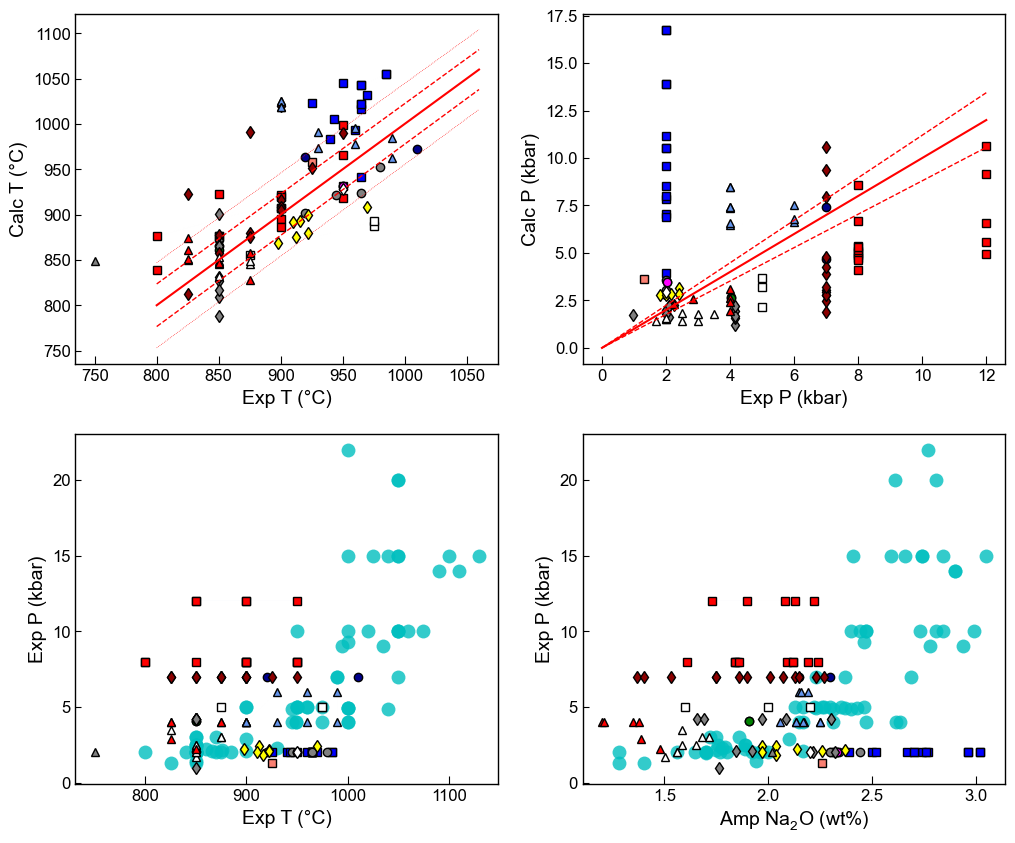

In [18]:

cali_R=pt.return_cali_dataset(model="Ridolfi2021")

fig, ((ax0, ax1), (ax4, ax5)) = plt.subplots(2, 2, figsize=(12,10))
colors = ('red', 'blue', 'salmon', 'white','grey', 
          'magenta', 'darkblue', 'green', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'white', 
          'red', 'saddlebrown')

ncolor = 0
markers = ('s', 's', 's', 's',
           'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd',
           '^','^','^','^',
           'p')
nmarkers = 0



for ref in Amp_Glass_filt2['Citation_x'].unique():
    print(ref)
    
    ax0.plot(
             Amp_Glass_filt2['T_K_x'].loc[Amp_Glass_filt2['Citation_x']==ref]-273.15, 
        Press_Ridolfi12_Filt['T_K_calc'].loc[Amp_Glass_filt2['Citation_x']==ref]-273.15,
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref                       )
        
    # ax5.plot(
    #          Amp_Glass_filt2['H2O_Liq'].loc[Amp_Glass_filt2['Citation_x']==ref], 
    #     Calc_Comp['H2O_Ridolfi21'].loc[Amp_Glass_filt2['Citation_x']==ref],
    #   marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref                       )

    # ax6.plot(
    #          Amp_Glass_filt2['DeltaNNO'].loc[Amp_Glass_filt2['Citation_x']==ref], 
    #     Calc_Comp['deltaNNO_Ridolfi21'].loc[Amp_Glass_filt2['Citation_x']==ref],
    #   marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref                       )
    
    

    ax1.plot(
             Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
        Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']==ref],
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref                       )
    #ax1.legend()
    
#     ax2.plot(Press_Ridolfi12_Filt['Na2O_Amp'].loc[Amp_Glass_filt2['Citation_x']==ref],
#              Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']==ref]-
#              Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
#       marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,                          )

#     ax3.plot(Amp_Glass_filt2['T_K_x'].loc[Amp_Glass_filt2['Citation_x']==ref],
#              Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']==ref]-
#              Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
#       marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,                          )
    
    
    ax5.plot(Press_Ridolfi12_Filt['Na2O_Amp'].loc[Amp_Glass_filt2['Citation_x']==ref],

             Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,                          )

    ax4.plot(Amp_Glass_filt2['T_K_x'].loc[Amp_Glass_filt2['Citation_x']==ref]-273.15,

             Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,                          )


    ncolor+=1
    nmarkers+=1
    
    
ax4.plot(cali_R['T_K']-273.15,cali_R['P_kbar'],  'oc', mec='None', mfc='c', ms=10, zorder=0, alpha=0.8)



    
ax5.plot(cali_R['Na2O_Amp'],cali_R['P_kbar'],  'oc', mec='None', mfc='c', ms=10, zorder=0, alpha=0.8)

ax1.plot([0, 12], [0, 12], '-r')
ax1.plot([0, 12], [0, 12*1.12], '--r', lw=1)
ax1.plot([0, 12], [0, 12*(1-0.12)], '--r', lw=1)
# ax5.plot([4, 11], [4, 11], '-r')
ax0.plot([800, 1060], [800, 1060], '-r')
ax0.plot([800, 1060], [800+23.5, 1060+22], '--r', lw=1)
ax0.plot([800, 1060], [800-23.5, 1060-22], '--r', lw=1)
ax0.plot([800, 1060], [800+2*23.5, 1060+2*22], ':r', lw=0.5)
ax0.plot([800, 1060], [800-2*23.5, 1060-2*22], ':r', lw=0.5)
ax0.set_xlabel('Exp T (°C)')
ax0.set_ylabel('Calc T (°C)')

# ax5.set_xlabel('H$_2$O Exp (wt%)')
# ax5.set_ylabel('H$_2$O Calc (wt%)')

ax1.set_xlabel('Exp P (kbar)')
ax1.set_ylabel('Calc P (kbar)')

ax5.set_xlabel('Amp Na$_2$O (wt%)')
ax5.set_ylabel('Exp P (kbar)')

ax4.set_xlabel('Exp T (°C)')
ax4.set_ylabel('Exp P (kbar)')


#ax0.legend()

fig.savefig('Ridolfi_test.png', dpi=300, transparent=True, bbox_inches='tight')

In [19]:
len(Amp_Glass_filt2['T_K_x'])

99

## Statistics 

In [20]:
Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']!=ref].to_clipboard(excel=True)

In [21]:
Amp_Glass_filt2['Citation_x'].unique()

array(['Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8',
       'Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225',
       'Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generate

In [22]:
plt.plot(Press_Ridolfi12_Filt['P_kbar_calc'].loc[~Filt],
    Amp_Glass_filt2['P_kbar_x'].loc[~Filt], 'ok')
plt.plot([0, 8], [0, 8], '-r')

NameError: name 'Filt' is not defined

In [24]:
pt.calculate_R2(Press_Ridolfi12_Filt['T_K_calc'],
    Amp_Glass_filt2['T_K_x'])

{'R2': '0.51',
 'RMSE': '50.51',
 'RMSE_num': 50.51,
 'P_val': '0.000',
 'Median': '-14.85',
 'Mean': '-17.18',
 'Int': array([500.67554343]),
 'Grad': array([0.56549004]),
 'x_pred': array([[1180.77103042],
        [1149.92975365],
        [1238.48936253],
        [1168.82330492],
        [1196.20513358],
        [1272.24497079],
        [1180.04250786],
        [1149.27016755],
        [1111.89990941],
        [1191.59306122],
        [1194.56203618],
        [1192.62596744],
        [1149.2460181 ],
        [1205.08995967],
        [1159.04340893],
        [1214.93367372],
        [1305.35960444],
        [1289.4013353 ],
        [1318.35136887],
        [1296.59096998],
        [1256.25655536],
        [1266.04093012],
        [1278.215435  ],
        [1328.0075915 ],
        [1328.0075915 ],
        [1315.61845153],
        [1315.61845153],
        [1295.44687403],
        [1295.44687403],
        [1230.65208421],
        [1160.11304966],
        [1128.64979053],
        [1165.622

In [25]:
SG='Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225'
Al='Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8'
Filt=(Amp_Glass_filt2['Citation_x']==SG) | (Amp_Glass_filt2['Citation_x']==Al)
pt.calculate_R2(Press_Ridolfi12_Filt['P_kbar_calc'],
    Amp_Glass_filt2['P_kbar_x'])

{'R2': '0.01',
 'RMSE': '4.19',
 'RMSE_num': 4.19,
 'P_val': '0.261',
 'Median': '0.29',
 'Mean': '-0.43',
 'Int': array([4.04552245]),
 'Grad': array([0.09300685]),
 'x_pred': array([[ 6.57920394],
        [ 4.96580903],
        [10.63841293],
        [ 5.57180736],
        [ 9.15587171],
        [ 6.6668635 ],
        [ 5.12120258],
        [ 5.00682404],
        [ 4.10116539],
        [ 5.37272055],
        [ 4.91491068],
        [ 8.55291287],
        [ 4.7205616 ],
        [ 5.3323298 ],
        [ 4.61826623],
        [ 3.95511263],
        [ 8.53145725],
        [ 7.83342084],
        [11.15632321],
        [ 9.59335149],
        [ 7.03197783],
        [ 6.91773906],
        [ 7.98561037],
        [13.88645327],
        [13.88645327],
        [16.75913345],
        [16.75913345],
        [10.54989245],
        [10.54989245],
        [ 3.60786254],
        [ 3.21793387],
        [ 2.16487786],
        [ 3.65543124],
        [ 3.57903128],
        [ 3.05936831],
        [ 2.8319171

In [26]:
SG='Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225'
Al='Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8'
Filt=(Amp_Glass_filt2['Citation_x']==SG) # | (Amp_Glass_filt2['Citation_x']==Al)
pt.calculate_R2(Press_Ridolfi12_Filt['P_kbar_calc'].loc[~Filt],
    Amp_Glass_filt2['P_kbar_x'].loc[~Filt])

{'R2': '0.33',
 'RMSE': '2.57',
 'RMSE_num': 2.57,
 'P_val': '0.000',
 'Median': '0.88',
 'Mean': '0.89',
 'Int': array([2.17889213]),
 'Grad': array([0.67912132]),
 'x_pred': array([[ 6.57920394],
        [ 4.96580903],
        [10.63841293],
        [ 5.57180736],
        [ 9.15587171],
        [ 6.6668635 ],
        [ 5.12120258],
        [ 5.00682404],
        [ 4.10116539],
        [ 5.37272055],
        [ 4.91491068],
        [ 8.55291287],
        [ 4.7205616 ],
        [ 5.3323298 ],
        [ 4.61826623],
        [ 3.60786254],
        [ 3.21793387],
        [ 2.16487786],
        [ 3.65543124],
        [ 3.57903128],
        [ 3.05936831],
        [ 2.8319171 ],
        [ 2.80459126],
        [ 3.46018805],
        [ 3.46018805],
        [ 7.41344615],
        [ 4.68211107],
        [ 2.7047409 ],
        [ 2.61538834],
        [ 3.17224728],
        [ 2.82406673],
        [ 2.76636093],
        [ 2.79249302],
        [ 2.837203  ],
        [ 2.23027215],
        [ 2.25734775

In [27]:
SG='test5'
pt.calculate_R2(Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']!=SG],
        Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']!=SG])

{'R2': '0.01',
 'RMSE': '4.19',
 'RMSE_num': 4.19,
 'P_val': '0.261',
 'Median': '-0.29',
 'Mean': '0.43',
 'Int': array([4.30101173]),
 'Grad': array([0.1395646]),
 'x_pred': array([[12.00000048],
        [12.00000048],
        [12.00000048],
        [12.00000048],
        [12.00000048],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 1.32400006],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003

In [28]:
SG='Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225'
pt.calculate_R2(Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']!=SG],
        Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']!=SG])

{'R2': '0.33',
 'RMSE': '2.57',
 'RMSE_num': 2.57,
 'P_val': '0.000',
 'Median': '-0.88',
 'Mean': '-0.89',
 'Int': array([1.60679285]),
 'Grad': array([0.49308383]),
 'x_pred': array([[12.00000048],
        [12.00000048],
        [12.00000048],
        [12.00000048],
        [12.00000048],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 1.32400006],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.03      ],
        [ 2.03      ],
        [ 7.        ],
        [ 7.        ],
        [ 4.04      ],
        [ 4.04      ],
        [ 2.4       ],
        [ 2.4       ],
        [ 1.8       ],
        [ 2.        ],
        [ 2.15      ],
        [ 2.1       ],
        [ 2.25    

In [29]:
print(min(Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']!=SG]))
print(max(Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']!=SG]))

1.1786236545071531
10.638412929936743


In [30]:
SG='Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225'
pt.calculate_R2(Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']!=SG],
        Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']!=SG])

{'R2': '0.33',
 'RMSE': '2.57',
 'RMSE_num': 2.57,
 'P_val': '0.000',
 'Median': '-0.88',
 'Mean': '-0.89',
 'Int': array([1.60679285]),
 'Grad': array([0.49308383]),
 'x_pred': array([[12.00000048],
        [12.00000048],
        [12.00000048],
        [12.00000048],
        [12.00000048],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 8.00000012],
        [ 1.32400006],
        [ 5.        ],
        [ 5.        ],
        [ 5.        ],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.00000003],
        [ 2.03      ],
        [ 2.03      ],
        [ 7.        ],
        [ 7.        ],
        [ 4.04      ],
        [ 4.04      ],
        [ 2.4       ],
        [ 2.4       ],
        [ 1.8       ],
        [ 2.        ],
        [ 2.15      ],
        [ 2.1       ],
        [ 2.25    

In [31]:
pt.calculate_R2(Amp_Glass_filt2['T_K_x'],
        Press_Ridolfi12_Filt['T_K_calc'])

{'R2': '0.51',
 'RMSE': '50.51',
 'RMSE_num': 50.51,
 'P_val': '0.000',
 'Median': '14.85',
 'Mean': '17.18',
 'Int': array([123.20508001]),
 'Grad': array([0.90974134]),
 'x_pred': array([[1173.15],
        [1123.15],
        [1223.15],
        [1173.15],
        [1123.15],
        [1223.15],
        [1173.15],
        [1123.15],
        [1073.15],
        [1223.15],
        [1173.15],
        [1173.15],
        [1073.15],
        [1223.15],
        [1173.15],
        [1238.15],
        [1243.15],
        [1238.15],
        [1223.15],
        [1198.15],
        [1213.15],
        [1233.15],
        [1216.15],
        [1258.15],
        [1258.15],
        [1238.15],
        [1238.15],
        [1238.15],
        [1238.15],
        [1198.15],
        [1248.15],
        [1148.15],
        [1248.15],
        [1253.15],
        [1238.15],
        [1218.15],
        [1193.15],
        [1223.15],
        [1223.15],
        [1283.15],
        [1193.15],
        [1123.15],
        [1123.15],
  

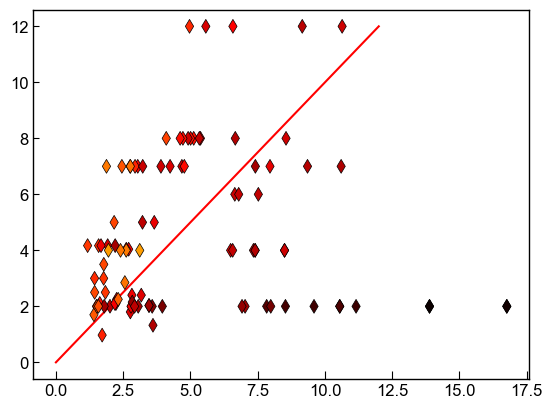

In [32]:
plt.scatter(Press_Ridolfi12['P_kbar_calc'].loc[Press_Ridolfi12['Input_Check']==True],
         Amp_Glass_filt['P_kbar_x'].loc[Press_Ridolfi12['Input_Check']==True],   
            marker='d', s=50, edgecolors='k', linewidths=0.5,
            c= Amp_Glass_filt['Na2O_Amp'].loc[Press_Ridolfi12['Input_Check']==True], cmap='hot_r',
vmin = 0, vmax = 3, zorder=100)
                                       
plt.plot([0, 12], [0, 12], '-r')

## Which ones are higher Na2O

In [33]:
Amp_Glass_filt.loc[Amp_Glass_filt['Na2O_Amp']>2.5]

,Unnamed: 0,index,Citation_x,Experiment,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,P2O5_Amp,T_K_x,P_kbar_x,Duration,Laboratory,N_meas_Amp,Cl_Amp,Experiment_long,Experiment_P_Name_x,Plag,Ol,Amp,Cpx,Opx,Citation_y,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,DeltaNNO,logfo2,T_K_y,P_kbar_y,Experiment_P_Name_y,H2O_Liq_Method,N_meas_Liq
18,18,18,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",87S35a-#3,40.700001,3.04000,14.00000,10.60000,0.13,14.70000,11.90000,2.74000,0.46000,0.00,0.0,1243.15,2.0000,8.0,Massachusetts Institute of Technology,NaN,NaN,Sisson87S35a-#3,Sisson2.0,Yes,Yes,Yes,No,No,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",52.099998,1.270000,19.299999,8.350000,0.1500,4.140000,8.770000,4.490000,1.000000,0.00,0.42,6.00,NaN,NaN,1243.15,2.0000,Sisson2.0,NaN,NaN
19,19,19,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",87S35a-#11,39.799999,2.72000,13.60000,11.40000,0.14,14.20000,12.00000,2.67000,0.49000,0.00,0.0,1238.15,2.0000,63.0,Massachusetts Institute of Technology,NaN,NaN,Sisson87S35a-#11,Sisson2.0,Yes,Yes,Yes,No,No,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",53.200001,1.100000,19.200001,7.630000,0.1600,3.660000,8.580000,4.540000,1.230000,0.00,0.64,6.00,NaN,NaN,1238.15,2.0000,Sisson2.0,NaN,NaN
20,20,20,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",87S35a-#10,41.299999,3.17000,13.40000,11.20000,0.16,13.70000,11.80000,2.77000,0.49000,0.00,0.0,1223.15,2.0000,71.0,Massachusetts Institute of Technology,NaN,NaN,Sisson87S35a-#10,Sisson2.0,Yes,No,Yes,No,No,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",56.900002,0.820000,18.600000,6.290000,0.1800,2.680000,7.230000,5.070000,1.480000,0.00,0.77,6.00,NaN,NaN,1223.15,2.0000,Sisson2.0,NaN,NaN
21,21,21,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",87S35a-#13,41.099998,2.71000,13.40000,13.00000,0.19,13.40000,11.60000,2.76000,0.46000,0.00,0.0,1198.15,2.0000,66.0,Massachusetts Institute of Technology,NaN,NaN,Sisson87S35a-#13,Sisson2.0,Yes,No,Yes,No,No,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",60.000000,0.580000,18.900000,5.270000,0.1900,1.760000,5.660000,5.440000,1.780000,0.00,0.37,6.00,NaN,NaN,1198.15,2.0000,Sisson2.0,NaN,NaN
24,24,24,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",85S52b+An80#9,42.000000,2.62000,13.10000,10.80000,0.20,14.60000,11.70000,2.52000,0.73000,0.00,0.0,1216.15,2.0000,72.0,Massachusetts Institute of Technology,NaN,NaN,Sisson85S52b+An80#9,Sisson2.0,Yes,Yes,Yes,No,No,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",57.099998,0.700000,19.100000,6.900000,0.1600,2.800000,6.590000,4.170000,2.130000,0.00,0.39,6.00,NaN,NaN,1216.15,2.0000,Sisson2.0,NaN,NaN
25,25,25,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",82-66+NaOH#2,40.599998,2.01000,14.40000,11.00000,0.14,14.90000,11.80000,3.02000,0.32000,0.00,0.0,1258.15,2.0000,54.0,Massachusetts Institute of Technology,NaN,NaN,Sisson82-66+NaOH#2,Sisson2.0,No,Yes,Yes,Yes,No,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",54.799999,0.620000,20.100000,6.580000,0.1600,3.320000,7.630000,5.560000,0.940000,0.00,0.28,6.00,NaN,NaN,1258.15,2.0000,Sisson2.0,NaN,NaN
26,26,25,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",82-66+NaOH#2,40.599998,2.01000,14.40000,11.00000,0.14,14.90000,11.80000,3.02000,0.32000,0.00,0.0,1258.15,2.0000,54.0,Massachusetts Institute of Technology,NaN,NaN,Sisson82-66+NaOH#2,Sisson2.0,No,Yes,Yes,Yes,No,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",54.799999,0.620000,20.100000,6.580000,0.1600,3.320000,7.630000,5.560000,0.940000,0.00,0.28,6.00,NaN,NaN,1258.15,2.0000,Sisson2.0,NaN,NaN
27,27,26,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",82-66+NaOH#1,42.099998,1.61000,13.70000,11.10000,0.14,14.30000,11.60000,2.96000,0.33000,0.00,0.0,1238.15,2.0000,49.0,Massachusetts Institute of Technology,NaN,NaN,Sisson82-66+NaOH#1,Sisson2.0,No,No,Yes,Yes,No,"Sisson, T.W., Grove, T.L. (1993) Experimental ...",56.200001,0.340000,20.400000,5.880000,

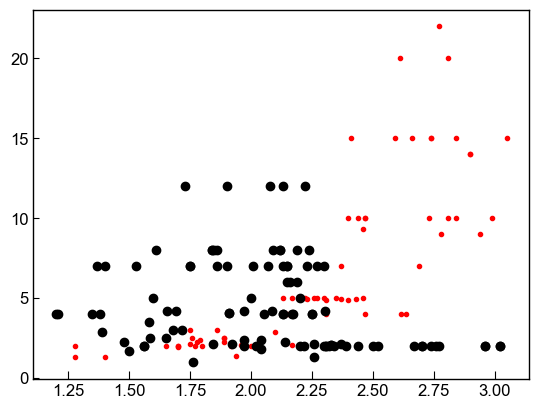

In [34]:
cali_R=pt.return_cali_dataset(model="Ridolfi2021")
plt.plot(cali_R['Na2O_Amp'], cali_R['P_kbar'], '.r')

plt.plot(Press_Ridolfi12['Na2O_Amp'].loc[Press_Ridolfi12['Input_Check']==True],
         Amp_Glass_filt['P_kbar_x'].loc[Press_Ridolfi12['Input_Check']==True],   
                                        'ok')
#p

Text(0.5, 0, 'Na2O Amp')

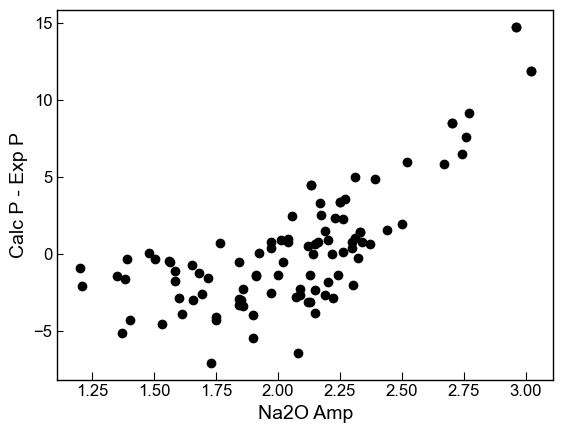

In [35]:
plt.plot(Press_Ridolfi12['Na2O_Amp'].loc[Press_Ridolfi12['Input_Check']==True],
         Press_Ridolfi12['P_kbar_calc'].loc[Press_Ridolfi12['Input_Check']==True]-
         Amp_Glass_filt['P_kbar_x'].loc[Press_Ridolfi12['Input_Check']==True],   
                                        'ok')
plt.ylabel('Calc P - Exp P')
plt.xlabel('Na2O Amp')
#plt.plot([0, 12], [0, 12], '-r')

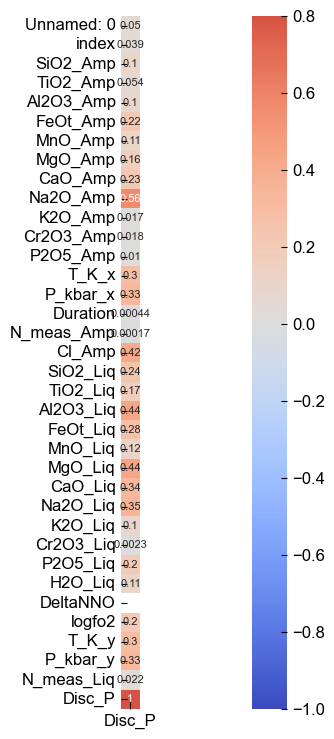

In [36]:
import seaborn as sns
Amp_Glass_filt['Disc_P']=Amp_Glass_filt['P_kbar_x']-Press_Ridolfi12['P_kbar_calc']
Amp_Glass_filt
corrmat = Amp_Glass_filt.corr()
f, ax = plt.subplots(figsize=(29, 9))
x1=corrmat[['Disc_P']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

In [18]:
Press_Ridolfi12=pt.calculate_amp_only_press_temp(amp_comps=myAmps1, equationT="T_Ridolfi2012", equationP="P_Ridolfi2021")
Eq_Ridolfi12=pt.calculate_R2(Amp_Glass['T_K_x'].loc[Press_Ridolfi_12], Press_Ridolfi12['T_K_calc'].loc[Press_Ridolfi_12]) # N17 Fixed T
Dict_Ridolfi12 = {'R$^{2}$': Eq_Ridolfi12['R2'], 'RMSE (K)': Eq_Ridolfi12['RMSE'], 'Median Error (K)':
                  Eq_Ridolfi12['Median'], 'Mean Error (K)': Eq_Ridolfi12['Mean']}

print(Dict_Ridolfi12)
                                           
                                           
Press_Ridolfi12_knownP=pt.calculate_amp_only_temp(amp_comps=myAmps1, equationT="T_Ridolfi2012", P=Amp_Glass['P_kbar_x'])
Eq_Ridolfi12_knownP=pt.calculate_R2(Amp_Glass['T_K_x'].loc[Press_Ridolfi_12], Press_Ridolfi12_knownP.loc[Press_Ridolfi_12]) # N17 Fixed T
Dict_Ridolfi12_knownP = {'R$^{2}$': Eq_Ridolfi12_knownP['R2'], 'RMSE (K)': Eq_Ridolfi12_knownP['RMSE'], 'Median Error (K)':
                  Eq_Ridolfi12_knownP['Median'], 'Mean Error (K)': Eq_Ridolfi12_knownP['Mean']}

Dict_Ridolfi12_knownP

NameError: name 'Press_Ridolfi_12' is not defined

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


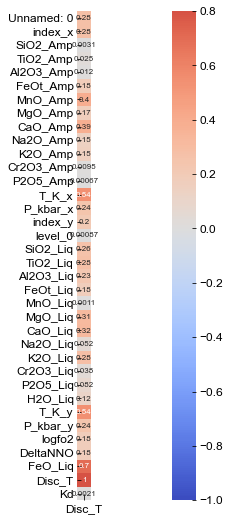

In [7]:
import seaborn as sns
Amp_Glass['Disc_T']=Amp_Glass['T_K_x']-Press_Ridolfi12_knownP
Amp_Glass['Kd']=Mgno_anhyd
corrmat = Amp_Glass.loc[Press_Ridolfi_12].corr()
f, ax = plt.subplots(figsize=(29, 9))
x1=corrmat[['Disc_T']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


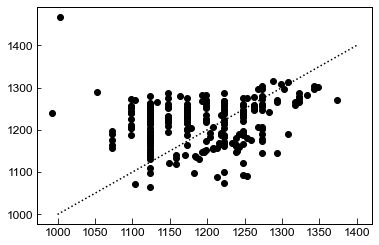

In [8]:
plt.plot(Amp_Glass['T_K_x'].loc[Press_Ridolfi_12], Press_Ridolfi12_knownP.loc[Press_Ridolfi_12], 'ok')
plt.plot([1000, 1400], [1000, 1400], ':k')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


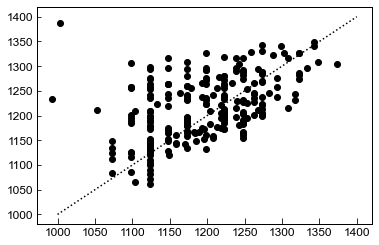

In [9]:
plt.plot(Amp_Glass['T_K_x'].loc[Press_Ridolfi_12], Press_Ridolfi12['T_K_calc'].loc[Press_Ridolfi_12], 'ok')
plt.plot([1000, 1400], [1000, 1400], ':k')

In [10]:
Amp_Glass_12=Amp_Glass.loc[Press_Ridolfi_12]
Amp_Glass_12.loc[Press_Ridolfi12['T_K_calc']>1600]

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,index_x,Citation_x,Experiment_x,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,P2O5_Amp,T_K_x,P_kbar_x,Experiment_long,Experiment_P_Name_x,index_y,level_0,Citation_y,Experiment_y,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,T_K_y,P_kbar_y,H2O_Liq_Method,logfo2,DeltaNNO,FeO_Liq,Experiment_P_Name_y,Disc_T,Kd


## Amphibole-only presures Using Ridolfi Dataset

In [11]:
Press_Ridolfi21=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Ridolfi2021")
Eq_Ridolfi21=pt.calculate_R2(Amp_Glass['P_kbar_x'].loc[Press_RidolfiMask], Press_Ridolfi21['P_kbar_calc'].loc[Press_RidolfiMask]) # N17 Fixed T
Dict_Ridolfi21 = {'R$^{2}$': Eq_Ridolfi21['R2'], 'RMSE (kbar)': Eq_Ridolfi21['RMSE'], 'Median Error (kbar)': Eq_Ridolfi21['Median'], 'Mean Error (kbar)': Eq_Ridolfi21['Mean']}


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The sum of Si, Ti, Al, Fe, Mg, Ca, Na and K based on 13 cations for some input amphiboles is <90; P=nan is returned for these analyses


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


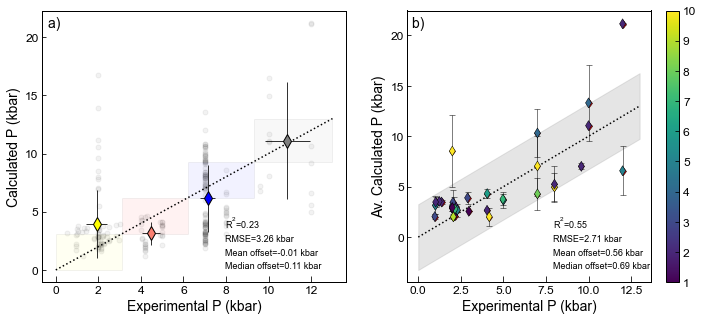

In [12]:

vmax=10

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)
model_H=Press_Ridolfi21.loc[Press_RidolfiMask]
model_H_Eq=Eq_Ridolfi21

x=Amp_Glass['P_kbar_x'].loc[Press_RidolfiMask]

model_H_sigma=model_H_Eq['RMSE_num']
model_H_RMSE=model_H_Eq['RMSE_num']

# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_RidolfiMask].values, y1.values, name="3033");


Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Press_RidolfiMask], model_H)


vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax3)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')



ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)


ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')


ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3)

av_r2=pt.calculate_R2(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'])
ax3.annotate("R$^{2}$="+str(av_r2['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE="+str(av_r2['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Mean offset="+str(av_r2['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax3.annotate("Median offset="+str(av_r2['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax1.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')


fig.savefig(r'../Calibration_Datasets/Amp_Liq_Rid21.png', dpi=100)

#C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\Calibration_Datasets

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


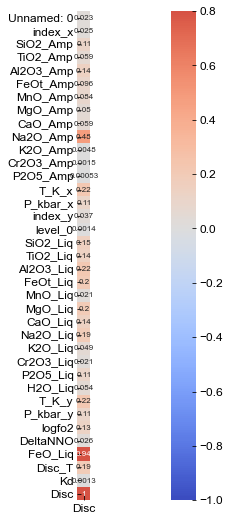

In [13]:
import seaborn as sns
Amp_Glass['Disc']=Amp_Glass['P_kbar_x']-Press_Ridolfi21['P_kbar_calc']
corrmat = Amp_Glass.loc[Press_RidolfiMask].corr()
f, ax = plt.subplots(figsize=(29, 9))
x1=corrmat[['Disc']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

## Temperature equations of Putirka using Putirka dataset

In [14]:
# Equation 8
Temp_Put2016_eq8=pt.calculate_amp_only_press_temp(amp_comps=myAmps1, equationT="T_Put2016_eq8", equationP="P_Ridolfi2021")
Eq_Put2016_eq8=pt.calculate_R2(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Put2016_eq8['T_K_calc'].loc[Generic_Test]) # N17 Fixed T
Dict_Put2016_eq8 = {'R$^{2}$': Eq_Put2016_eq8['R2'], 'RMSE (K)': Eq_Put2016_eq8['RMSE'], 'Median Error (K)':
                  Eq_Put2016_eq8['Median'], 'Mean Error (K)': Eq_Put2016_eq8['Mean']}

print(Dict_Put2016_eq8)
                                           
# Known pressures or not pressure sensitive  

Temp_Ridolfi12_knownP=pt.calculate_amp_only_temp(amp_comps=myAmps1, equationT="T_Ridolfi2012", P=Amp_Glass['P_kbar_x'])
Eq_Ridolfi12_knownP=pt.calculate_R2(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Ridolfi12_knownP.loc[Generic_Test]) # N17 Fixed T
Dict_Ridolfi12_knownP = {'R$^{2}$': Eq_Ridolfi12_knownP['R2'], 'RMSE (K)': Eq_Ridolfi12_knownP['RMSE'], 'Median Error (K)':
                  Eq_Ridolfi12_knownP['Median'], 'Mean Error (K)': Eq_Ridolfi12_knownP['Mean']}

Dict_Ridolfi12_knownP

Temp_Put2016_eq8_knownP=pt.calculate_amp_only_temp(amp_comps=myAmps1, equationT="T_Put2016_eq8", P=Amp_Glass['P_kbar_x'])
Eq_Put2016_eq8_knownP=pt.calculate_R2(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Put2016_eq8_knownP.loc[Generic_Test]) # N17 Fixed T
Dict_Put2016_eq8_knownP = {'R$^{2}$': Eq_Put2016_eq8_knownP['R2'], 'RMSE (K)': Eq_Put2016_eq8_knownP['RMSE'], 'Median Error (K)':
                  Eq_Put2016_eq8_knownP['Median'], 'Mean Error (K)': Eq_Put2016_eq8_knownP['Mean']}

Temp_Put2016_eq5=pt.calculate_amp_only_temp(amp_comps=myAmps1, equationT="T_Put2016_eq5")
Eq_Put2016_eq5=pt.calculate_R2(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Put2016_eq5.loc[Generic_Test]) # N17 Fixed T
Dict_Put2016_eq5 = {'R$^{2}$': Eq_Put2016_eq5['R2'], 'RMSE (K)': Eq_Put2016_eq5['RMSE'], 'Median Error (K)':
                  Eq_Put2016_eq5['Median'], 'Mean Error (K)': Eq_Put2016_eq5['Mean']}

print(Dict_Put2016_eq5)
                                           
Temp_Put2016_eq6=pt.calculate_amp_only_temp(amp_comps=myAmps1, equationT="T_Put2016_eq6", P=Amp_Glass['P_kbar_x'])
Eq_Put2016_eq6=pt.calculate_R2(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Put2016_eq6.loc[Generic_Test]) # N17 Fixed T
Dict_Put2016_eq6 = {'R$^{2}$': Eq_Put2016_eq6['R2'], 'RMSE (K)': Eq_Put2016_eq6['RMSE'], 'Median Error (K)':
                  Eq_Put2016_eq6['Median'], 'Mean Error (K)': Eq_Put2016_eq6['Mean']}

print(Dict_Put2016_eq6)
                                           
Temp_Put2016_SiHbl=pt.calculate_amp_only_temp(amp_comps=myAmps1, equationT="T_Put2016_SiHbl")
Eq_Put2016_SiHbl=pt.calculate_R2(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Put2016_SiHbl.loc[Generic_Test]) # N17 Fixed T
Dict_Put2016_SiHbl = {'R$^{2}$': Eq_Put2016_SiHbl['R2'], 'RMSE (K)': Eq_Put2016_SiHbl['RMSE'], 'Median Error (K)':
                  Eq_Put2016_SiHbl['Median'], 'Mean Error (K)': Eq_Put2016_SiHbl['Mean']}

print(Dict_Put2016_SiHbl)
                                           
   


The sum of Si, Ti, Al, Fe, Mg, Ca, Na and K based on 13 cations for some input amphiboles is <90; P=nan is returned for these analyses
{'R$^{2}$': '0.49', 'RMSE (K)': '50.34', 'Median Error (K)': '-1.06', 'Mean Error (K)': '5.95'}
{'R$^{2}$': '0.48', 'RMSE (K)': '50.90', 'Median Error (K)': '-2.69', 'Mean Error (K)': '3.46'}
{'R$^{2}$': '0.47', 'RMSE (K)': '51.05', 'Median Error (K)': '-5.78', 'Mean Error (K)': '1.65'}
{'R$^{2}$': '0.28', 'RMSE (K)': '60.64', 'Median Error (K)': '-1.67', 'Mean Error (K)': '5.31'}


In [15]:
Temp_KnownP_NotInPutirka=pd.DataFrame({'T=Ridolfi_2012, P=Exp':pd.Series(Dict_Ridolfi12_knownP),
                          'T=Put2016_eq5, P=Exp':pd.Series(Dict_Put2016_eq5),
                          'T=Put2016_eq6, P=Exp':pd.Series(Dict_Put2016_eq6),
                          'T=Put2016_eq8, P=Exp':pd.Series(Dict_Put2016_eq8), 
                          'T=Put2016_SiHbl, P=Exp':pd.Series(Dict_Put2016_SiHbl)}).T
Temp_KnownP_NotInPutirka

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,R$^{2}$,RMSE (K),Median Error (K),Mean Error (K)
"T=Ridolfi_2012, P=Exp",0.02,84.25,17.35,21.05
"T=Put2016_eq5, P=Exp",0.48,50.90,-2.69,3.46
"T=Put2016_eq6, P=Exp",0.47,51.05,-5.78,1.65
"T=Put2016_eq8, P=Exp",0.49,50.34,-1.06,5.95
"T=Put2016_SiHbl, P=Exp",0.28,60.64,-1.67,5.31


In [16]:
Dict_Put2016_eq8

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'R$^{2}$': '0.49',
 'RMSE (K)': '50.34',
 'Median Error (K)': '-1.06',
 'Mean Error (K)': '5.95'}

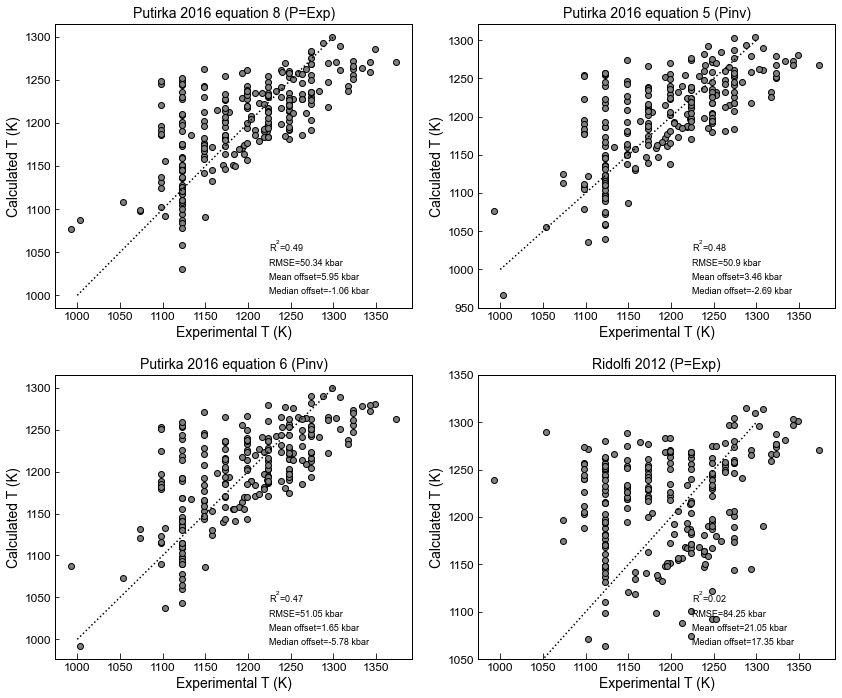

In [19]:
b=0
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,10))
ax1.set_title('Putirka 2016 equation 8 (P=Exp)')
ax1.plot(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Put2016_eq8_knownP.loc[Generic_Test], 'ok', mfc='grey')
ax1.plot([1000, 1300], [1000, 1300], ':k')
ax1.annotate("R$^{2}$="+str(Eq_Put2016_eq8['R2']), xy=(0.6, 0.2+b), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(Eq_Put2016_eq8['RMSE_num'])+" kbar", xy=(0.6, 0.15+b), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(Eq_Put2016_eq8['Mean'])+" kbar", xy=(0.6, 0.1+b), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(Eq_Put2016_eq8['Median'])+" kbar", xy=(0.6, 0.05+b), xycoords="axes fraction", fontsize=9)


ax2.set_title('Putirka 2016 equation 5 (Pinv)')
ax2.plot(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Put2016_eq5.loc[Generic_Test], 'ok', mfc='grey')
ax2.plot([1000, 1300], [1000, 1300], ':k')
ax2.annotate("R$^{2}$="+str(Eq_Put2016_eq5['R2']), xy=(0.6, 0.2+b), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(Eq_Put2016_eq5['RMSE_num'])+" kbar", xy=(0.6, 0.15+b), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(Eq_Put2016_eq5['Mean'])+" kbar", xy=(0.6, 0.1+b), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(Eq_Put2016_eq5['Median'])+" kbar", xy=(0.6, 0.05+b), xycoords="axes fraction", fontsize=9)



ax3.set_title('Putirka 2016 equation 6 (Pinv)')

ax3.plot(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Put2016_eq6.loc[Generic_Test], 'ok', mfc='grey')
ax3.plot([1000, 1300], [1000, 1300], ':k')

ax3.annotate("R$^{2}$="+str(Eq_Put2016_eq6['R2']), xy=(0.6, 0.2+b), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE="+str(Eq_Put2016_eq6['RMSE_num'])+" kbar", xy=(0.6, 0.15+b), xycoords="axes fraction", fontsize=9)
ax3.annotate("Mean offset="+str(Eq_Put2016_eq6['Mean'])+" kbar", xy=(0.6, 0.1+b), xycoords="axes fraction", fontsize=9)
ax3.annotate("Median offset="+str(Eq_Put2016_eq6['Median'])+" kbar", xy=(0.6, 0.05+b), xycoords="axes fraction", fontsize=9)



ax4.set_title('Ridolfi 2012 (P=Exp)')
ax4.plot(Amp_Glass['T_K_x'].loc[Generic_Test], Temp_Ridolfi12_knownP.loc[Generic_Test], 'ok', mfc='grey')
ax4.plot([1000, 1300], [1000, 1300], ':k')
ax4.annotate("R$^{2}$="+str(Eq_Ridolfi12_knownP['R2']), xy=(0.6, 0.2+b), xycoords="axes fraction", fontsize=9)
ax4.annotate("RMSE="+str(Eq_Ridolfi12_knownP['RMSE_num'])+" kbar", xy=(0.6, 0.15+b), xycoords="axes fraction", fontsize=9)
ax4.annotate("Mean offset="+str(Eq_Ridolfi12_knownP['Mean'])+" kbar", xy=(0.6, 0.1+b), xycoords="axes fraction", fontsize=9)
ax4.annotate("Median offset="+str(Eq_Ridolfi12_knownP['Median'])+" kbar", xy=(0.6, 0.05+b), xycoords="axes fraction", fontsize=9)


ax1.set_ylabel('Calculated T (K)')
ax2.set_ylabel('Calculated T (K)')
ax3.set_ylabel('Calculated T (K)')
ax4.set_ylabel('Calculated T (K)')

ax1.set_xlabel('Experimental T (K)')
ax2.set_xlabel('Experimental T (K)')
ax3.set_xlabel('Experimental T (K)')
ax4.set_xlabel('Experimental T (K)')
fig.tight_layout(pad=1.5)
ax4.set_ylim([1050, 1350])

fig.savefig(r'../Calibration_Datasets/Amp_only_temp.png', dpi=100)

# Putirka equations but using dataset being used for Ridolfi to check its not a shity dtaset

In [20]:
Press_Ridolfi2021=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Ridolfi2021")
Eq_Ridolfi2021=pt.calculate_R2(Amp_Glass['P_kbar_x'].loc[Generic_Test], Press_Ridolfi2021['P_kbar_calc'].loc[Generic_Test]) # N17 Fixed T
Dict_Ridolfi2021 = {'R$^{2}$': Eq_Ridolfi2021['R2'], 'RMSE (kbar)': Eq_Ridolfi2021['RMSE'], 'Median Error (kbar)':
                  Eq_Ridolfi2021['Median'], 'Mean Error (kbar)': Eq_Ridolfi2021['Mean']}

print(Dict_Ridolfi2021)

Press_Ridolfi2010=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Ridolfi2010")
Eq_Ridolfi2010=pt.calculate_R2(Amp_Glass['P_kbar_x'].loc[Generic_Test], Press_Ridolfi2010.loc[Generic_Test]) # N17 Fixed T
Dict_Ridolfi2010 = {'R$^{2}$': Eq_Ridolfi2010['R2'], 'RMSE (kbar)': Eq_Ridolfi2010['RMSE'], 'Median Error (kbar)':
                  Eq_Ridolfi2010['Median'], 'Mean Error (kbar)': Eq_Ridolfi2010['Mean']}

print(Dict_Ridolfi2010)
                                           
                                           
Press_Hollister1987=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Hollister1987")
Eq_Hollister1987=pt.calculate_R2(Amp_Glass['P_kbar_x'].loc[Generic_Test], Press_Hollister1987.loc[Generic_Test]) # N17 Fixed T
Dict_Hollister1987 = {'R$^{2}$': Eq_Hollister1987['R2'], 'RMSE (kbar)': Eq_Hollister1987['RMSE'], 'Median Error (kbar)':
                  Eq_Hollister1987['Median'], 'Mean Error (kbar)': Eq_Hollister1987['Mean']}

print(Dict_Hollister1987)

Press_Johnson1989=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Johnson1989")
Eq_Johnson1989=pt.calculate_R2(Amp_Glass['P_kbar_x'].loc[Generic_Test], Press_Johnson1989.loc[Generic_Test]) # N17 Fixed T
Dict_Johnson1989 = {'R$^{2}$': Eq_Johnson1989['R2'], 'RMSE (kbar)': Eq_Johnson1989['RMSE'], 'Median Error (kbar)':
                  Eq_Johnson1989['Median'], 'Mean Error (kbar)': Eq_Johnson1989['Mean']}

print(Dict_Johnson1989)

Press_Schmidt1992=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Schmidt1992")
Eq_Schmidt1992=pt.calculate_R2(Amp_Glass['P_kbar_x'].loc[Generic_Test], Press_Schmidt1992.loc[Generic_Test]) # N17 Fixed T
Dict_Schmidt1992 = {'R$^{2}$': Eq_Schmidt1992['R2'], 'RMSE (kbar)': Eq_Schmidt1992['RMSE'], 'Median Error (kbar)':
                  Eq_Schmidt1992['Median'], 'Mean Error (kbar)': Eq_Schmidt1992['Mean']}

print(Dict_Schmidt1992)

Press_Anderson1995=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Anderson1995", T=Amp_Glass['T_K_x'])
Eq_Anderson1995=pt.calculate_R2(Amp_Glass['P_kbar_x'].loc[Generic_Test], Press_Anderson1995.loc[Generic_Test]) # N17 Fixed T
Dict_Anderson1995 = {'R$^{2}$': Eq_Anderson1995['R2'], 'RMSE (kbar)': Eq_Anderson1995['RMSE'], 'Median Error (kbar)':
                  Eq_Anderson1995['Median'], 'Mean Error (kbar)': Eq_Anderson1995['Mean']}

print(Dict_Anderson1995)

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The sum of Si, Ti, Al, Fe, Mg, Ca, Na and K based on 13 cations for some input amphiboles is <90; P=nan is returned for these analyses
{'R$^{2}$': '0.30', 'RMSE (kbar)': '3.15', 'Median Error (kbar)': '0.27', 'Mean Error (kbar)': '0.22'}
{'R$^{2}$': '0.40', 'RMSE (kbar)': '3.36', 'Median Error (kbar)': '-2.76', 'Mean Error (kbar)': '-2.53'}
{'R$^{2}$': '0.32', 'RMSE (kbar)': '2.87', 'Median Error (kbar)': '1.68', 'Mean Error (kbar)': '1.64'}
{'R$^{2}$': '0.32', 'RMSE (kbar)': '2.30', 'Median Error (kbar)': '-0.30', 'Mean Error (kbar)': '-0.04'}
{'R$^{2}$': '0.32', 'RMSE (kbar)': '2.77', 'Median Error (kbar)': '1.36', 'Mean Error (kbar)': '1.53'}
{'R$^{2}$': '0.01', 'RMSE (kbar)': '6.96', 'Median Error (kbar)': '-5.11', 'Mean Error (kbar)': '-5.89'}


## Tukey plot johnson

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


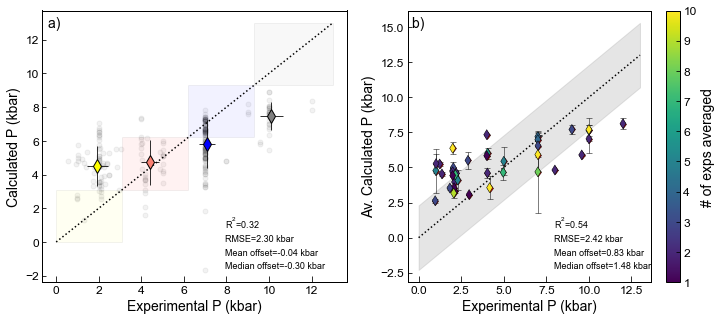

In [32]:

vmax=10
Press_Johnson1989_df=pd.DataFrame(data={'P_kbar_calc':Press_Johnson1989.values})
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)
model_H=Press_Johnson1989_df.loc[Generic_Test]
model_H_Eq=Eq_Johnson1989

x=Amp_Glass['P_kbar_x'].loc[Generic_Test]

model_H_sigma=model_H_Eq['RMSE_num']
model_H_RMSE=model_H_Eq['RMSE_num']

# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Generic_Test].values, y1.values, name="3033");


Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Generic_Test], model_H)


vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax3)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')



ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)


ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')


ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3, label='# of exps averaged')

av_r2=pt.calculate_R2(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'])
ax3.annotate("R$^{2}$="+str(av_r2['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE="+str(av_r2['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Mean offset="+str(av_r2['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax3.annotate("Median offset="+str(av_r2['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax1.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')


fig.savefig(r'../Calibration_Datasets/Amp_Liq_Rid2010.png', dpi=100)

#C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\Calibration_Datasets

## Tukey plot etc Ridolfi 2010

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


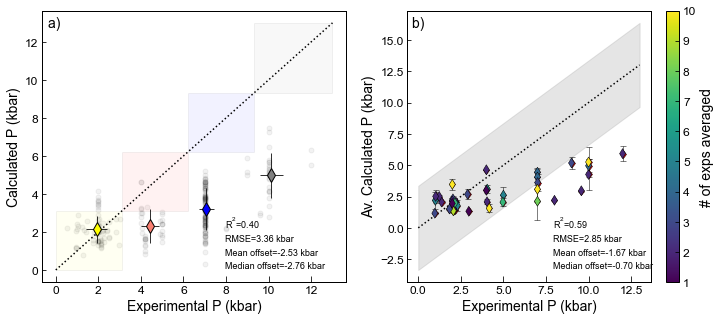

In [31]:

vmax=10
Press_Ridolfi2010_df=pd.DataFrame(data={'P_kbar_calc':Press_Ridolfi2010.values})
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)
model_H=Press_Ridolfi2010_df.loc[Generic_Test]
model_H_Eq=Eq_Ridolfi2010

x=Amp_Glass['P_kbar_x'].loc[Generic_Test]

model_H_sigma=model_H_Eq['RMSE_num']
model_H_RMSE=model_H_Eq['RMSE_num']

# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Generic_Test].values, y1.values, name="3033");


Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Generic_Test], model_H)


vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax3)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')



ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)


ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')


ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3, label='# of exps averaged')

av_r2=pt.calculate_R2(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_calc'])
ax3.annotate("R$^{2}$="+str(av_r2['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE="+str(av_r2['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Mean offset="+str(av_r2['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax3.annotate("Median offset="+str(av_r2['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax1.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')


fig.savefig(r'../Calibration_Datasets/Amp_Liq_Rid2010.png', dpi=100)

#C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\Calibration_Datasets

In [ ]:
plt.plot(Amp_Glass['P_kbar_x'], Press_Ridolfi2021['P_kbar_calc'], 'ok')
plt.plot([0, 10], [0, 10], ':r')

In [21]:
KnownP_Generic=pd.DataFrame({'P=Ridolfi_2021':pd.Series(Dict_Ridolfi2021),
                            'P=Ridolfi_2010':pd.Series(Dict_Ridolfi2010),
                          'P=Hollister1987':pd.Series(Dict_Hollister1987),
                          'P=Johnson1989':pd.Series(Dict_Johnson1989),
                          'P=Schmidt1992':pd.Series(Dict_Schmidt1992), 
                          'P=Anderson1995':pd.Series(Dict_Anderson1995)}).T
KnownP_Generic

,R$^{2}$,RMSE (kbar),Median Error (kbar),Mean Error (kbar)
P=Ridolfi_2021,0.30,3.15,0.27,0.22
P=Ridolfi_2010,0.40,3.36,-2.76,-2.53
P=Hollister1987,0.32,2.87,1.68,1.64
P=Johnson1989,0.32,2.30,-0.30,-0.04
P=Schmidt1992,0.32,2.77,1.36,1.53
P=Anderson1995,0.01,6.96,-5.11,-5.89


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


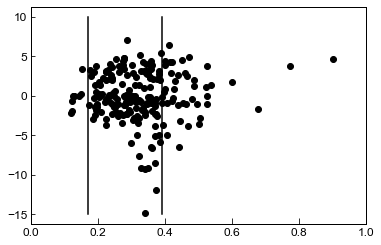

In [14]:
plt.plot(Mgno_anhyd.loc[Press_RidolfiMask], Amp_Glass['Disc'].loc[Press_RidolfiMask], 'ok')
plt.xlim([0, 1])
plt.plot([0.28-0.11, 0.28-0.11], [-15, 10], '-k')
plt.plot([0.28+0.11, 0.28+0.11], [-15, 10], '-k')

In [17]:
Amp_Glass.loc[abs(Amp_Glass['Disc'])>7, 'Na2O_Liq'].loc[Press_RidolfiMask]

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1     1.01
20    5.07
21    5.44
25    5.56
26    6.02
27    4.64
51    4.95
52    3.61
Name: Na2O_Liq, dtype: float64

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([2., 1., 3., 0., 0., 1., 0., 0., 0., 1.]),
 array([53.59999847, 54.81999893, 56.03999939, 57.25999985, 58.48000031,
        59.70000076, 60.92000122, 62.14000168, 63.36000214, 64.58000259,
        65.80000305]),
 <BarContainer object of 10 artists>)

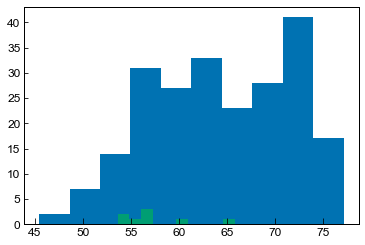

In [21]:
plt.hist(Amp_Glass['SiO2_Liq'].loc[Press_RidolfiMask])
plt.hist(Amp_Glass.loc[abs(Amp_Glass['Disc'])>7, 'SiO2_Liq'].loc[Press_RidolfiMask])

In [35]:
np.max(Amp_Glass['SiO2_Liq'])

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


77.099998474121

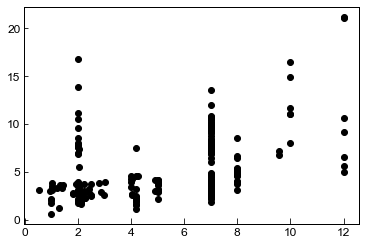

In [10]:
plt.plot(Amp_Glass['P_kbar_x'].loc[Press_RidolfiMask], Press_Ridolfi21['P_kbar_calc'].loc[Press_RidolfiMask], 'ok')

## Calculating pressure, known temperature and water content

In [5]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    Out_N17_FixedT=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Neave2017", T=Amp_Glass['T_K_x'])
    y_N17=Out_N17_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_N17_FixedT=pt.calculate_R2(x, y_N17) # N17 Fixed T
    
    Out_32c_FixedT=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq32c", T=Amp_Glass['T_K_x'])
    y_32c=Out_32c_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_32c_FixedT=pt.calculate_R2(x, y_32c) # N17 Fixed T

    Out_30_FixedT=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq30", T=Amp_Glass['T_K_x'])
    y_30=Out_30_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_30_FixedT=pt.calculate_R2(x, y_30) # N17 Fixed T

    Out_31_FixedT=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq31", T=Amp_Glass['T_K_x'])
    y_31=Out_31_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_31_FixedT=pt.calculate_R2(x, y_31) # N17 Fixed T

    Out_Put2003_FixedT=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2003", T=Amp_Glass['T_K_x'])
    y_Put2003=Out_Put2003_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_Put2003_FixedT=pt.calculate_R2(x, y_Put2003) # N17 Fixed T

    Out_Put1996_eqP2_FixedT=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put1996_eqP2", T=Amp_Glass['T_K_x'])
    y_Put1996_eqP2=Out_Put1996_eqP2_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_Put1996_eqP2_FixedT=pt.calculate_R2(x, y_Put1996_eqP2) # N17 Fixed T

    Out_Put1996_eqP1_FixedT=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put1996_eqP1", T=Amp_Glass['T_K_x'])
    y_Put1996_eqP1=Out_Put1996_eqP1_FixedT.loc[Press_new&(Eq_Mask)]
    Eq_Put1996_eqP1_FixedT=pt.calculate_R2(x, y_Put1996_eqP1) # N17 Fixed T
    
Dict_N17_FixedT = {'R$^{2}$': Eq_N17_FixedT['R2'], 'RMSE (kbar)': Eq_N17_FixedT['RMSE'], 'Median Error (kbar)': Eq_N17_FixedT['Median'], 'Mean Error (kbar)': Eq_N17_FixedT['Mean']}
Dict_32c_FixedT = {'R$^{2}$': Eq_32c_FixedT['R2'], 'RMSE (kbar)': Eq_32c_FixedT['RMSE'], 'Median Error (kbar)': Eq_32c_FixedT['Median'], 'Mean Error (kbar)': Eq_32c_FixedT['Mean']}
Dict_30_FixedT = {'R$^{2}$': Eq_30_FixedT['R2'], 'RMSE (kbar)': Eq_30_FixedT['RMSE'], 'Median Error (kbar)': Eq_30_FixedT['Median'], 'Mean Error (kbar)': Eq_30_FixedT['Mean']}
Dict_31_FixedT = {'R$^{2}$': Eq_31_FixedT['R2'], 'RMSE (kbar)': Eq_31_FixedT['RMSE'], 'Median Error (kbar)': Eq_31_FixedT['Median'], 'Mean Error (kbar)': Eq_31_FixedT['Mean']}
Dict_Put2003_FixedT = {'R$^{2}$': Eq_Put2003_FixedT['R2'], 'RMSE (kbar)': Eq_Put2003_FixedT['RMSE'], 'Median Error (kbar)': Eq_Put2003_FixedT['Median'], 'Mean Error (kbar)': Eq_Put2003_FixedT['Mean']}
Dict_Put1996_eqP2_FixedT = {'R$^{2}$': Eq_Put1996_eqP2_FixedT['R2'], 'RMSE (kbar)': Eq_Put1996_eqP2_FixedT['RMSE'], 'Median Error (kbar)': Eq_Put1996_eqP2_FixedT['Median'], 'Mean Error (kbar)': Eq_Put1996_eqP2_FixedT['Mean']}
Dict_Put1996_eqP1_FixedT = {'R$^{2}$': Eq_Put1996_eqP1_FixedT['R2'], 'RMSE (kbar)': Eq_Put1996_eqP1_FixedT['RMSE'], 'Median Error (kbar)': Eq_Put1996_eqP1_FixedT['Median'], 'Mean Error (kbar)': Eq_Put1996_eqP1_FixedT['Mean']}



C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Calculating pressure, Iterate T, known Water

In [6]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    Out_N17_T33=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Neave2017", equationT="T_Put2008_eq33")
    y_N17_T33=Out_N17_T33.loc[Press_new&(Eq_Mask)]
    Eq_N17_T33=pt.calculate_R2(x, y_N17_T33['P_kbar_calc']) # N17 Fixed T
    TEq_N17_T33=pt.calculate_R2(xT, y_N17_T33['T_K_calc']) # N17 Fixed T

    Out_32c_T33=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq32c", equationT="T_Put2008_eq33")
    y_32c_T33=Out_32c_T33.loc[Press_new&(Eq_Mask)]
    Eq_32c_T33=pt.calculate_R2(x, y_32c_T33['P_kbar_calc']) # N17 Fixed T
    TEq_32c_T33=pt.calculate_R2(xT, y_32c_T33['T_K_calc']) # N17 Fixed T

    Out_30_T33=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq30", equationT="T_Put2008_eq33")
    y_30_T33=Out_30_T33.loc[Press_new&(Eq_Mask)]
    Eq_30_T33=pt.calculate_R2(x, y_30_T33['P_kbar_calc']) # N17 Fixed T
    TEq_30_T33=pt.calculate_R2(xT, y_30_T33['T_K_calc']) # N17 Fixed T

    Out_31_T33=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq31", equationT="T_Put2008_eq33")
    y_31_T33=Out_31_T33.loc[Press_new&(Eq_Mask)]
    Eq_31_T33=pt.calculate_R2(x, y_31_T33['P_kbar_calc']) # N17 Fixed T
    TEq_31_T33=pt.calculate_R2(xT, y_31_T33['T_K_calc']) # N17 Fixed T

    Out_Put2003_T33=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2003", equationT="T_Put2003")
    y_Put2003_T33=Out_Put2003_T33.loc[Press_new&(Eq_Mask)]
    Eq_Put2003_T33=pt.calculate_R2(x, y_Put2003_T33['P_kbar_calc']) # N17 Fixed T
    TEq_Put2003_T33=pt.calculate_R2(xT, y_Put2003_T33['T_K_calc']) # N17 Fixed T

    Out_Put1996_eqP2_T33=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2")
    y_Put1996_eqP2_T33=Out_Put1996_eqP2_T33.loc[Press_new&(Eq_Mask)]
    Eq_Put1996_eqP2_T33=pt.calculate_R2(x, y_Put1996_eqP2_T33['P_kbar_calc']) # N17 Fixed T
    TEq_Put1996_eqP2_T33=pt.calculate_R2(xT, y_Put1996_eqP2_T33['T_K_calc']) # N17 Fixed T

    Out_Put1996_eqP1_T33=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put1996_eqP1", equationT="T_Put1996_eqT1")
    y_Put1996_eqP1_T33=Out_Put1996_eqP1_T33.loc[Press_new&(Eq_Mask)]
    Eq_Put1996_eqP1_T33=pt.calculate_R2(x, y_Put1996_eqP1_T33['P_kbar_calc']) # N17 Fixed T
    TEq_Put1996_eqP1_T33=pt.calculate_R2(xT, y_Put1996_eqP1_T33['T_K_calc']) # N17 Fixed T
    
Dict_N17_T33 = {'R$^{2}$': Eq_N17_T33['R2'], 'RMSE (kbar)': Eq_N17_T33['RMSE'], 'Median Error (kbar)': Eq_N17_T33['Median'], 'Mean Error (kbar)': Eq_N17_T33['Mean']}
Dict_32c_T33 = {'R$^{2}$': Eq_32c_T33['R2'], 'RMSE (kbar)': Eq_32c_T33['RMSE'], 'Median Error (kbar)': Eq_32c_T33['Median'], 'Mean Error (kbar)': Eq_32c_T33['Mean']}
Dict_30_T33 = {'R$^{2}$': Eq_30_T33['R2'], 'RMSE (kbar)': Eq_30_T33['RMSE'], 'Median Error (kbar)': Eq_30_T33['Median'], 'Mean Error (kbar)': Eq_30_T33['Mean']}
Dict_31_T33 = {'R$^{2}$': Eq_31_T33['R2'], 'RMSE (kbar)': Eq_31_T33['RMSE'], 'Median Error (kbar)': Eq_31_T33['Median'], 'Mean Error (kbar)': Eq_31_T33['Mean']}
Dict_Put2003_T33 = {'R$^{2}$': Eq_Put2003_T33['R2'], 'RMSE (kbar)': Eq_Put2003_T33['RMSE'], 'Median Error (kbar)': Eq_Put2003_T33['Median'], 'Mean Error (kbar)': Eq_Put2003_T33['Mean']}
Dict_Put1996_eqP2_T33 = {'R$^{2}$': Eq_Put1996_eqP2_T33['R2'], 'RMSE (kbar)': Eq_Put1996_eqP2_T33['RMSE'], 'Median Error (kbar)': Eq_Put1996_eqP2_T33['Median'], 'Mean Error (kbar)': Eq_Put1996_eqP2_T33['Mean']}
Dict_Put1996_eqP1_T33 = {'R$^{2}$': Eq_Put1996_eqP1_T33['R2'], 'RMSE (kbar)': Eq_Put1996_eqP1_T33['RMSE'], 'Median Error (kbar)': Eq_Put1996_eqP1_T33['Median'], 'Mean Error (kbar)': Eq_Put1996_eqP1_T33['Mean']}

TDict_N17_T33 = {'R$^{2}$': TEq_N17_T33['R2'], 'RMSE (°C)': TEq_N17_T33['RMSE'], 'Median Error (°C)': TEq_N17_T33['Median'], 'Mean Error (°C)': TEq_N17_T33['Mean']}
TDict_32c_T33 = {'R$^{2}$': TEq_32c_T33['R2'], 'RMSE (°C)': TEq_32c_T33['RMSE'], 'Median Error (°C)': TEq_32c_T33['Median'], 'Mean Error (°C)': TEq_32c_T33['Mean']}
TDict_30_T33 = {'R$^{2}$': TEq_30_T33['R2'], 'RMSE (°C)': TEq_30_T33['RMSE'], 'Median Error (°C)': TEq_30_T33['Median'], 'Mean Error (°C)': TEq_30_T33['Mean']}
TDict_31_T33 = {'R$^{2}$': TEq_31_T33['R2'], 'RMSE (°C)': TEq_31_T33['RMSE'], 'Median Error (°C)': TEq_31_T33['Median'], 'Mean Error (°C)': TEq_31_T33['Mean']}
TDict_Put2003_T33 = {'R$^{2}$': TEq_Put2003_T33['R2'], 'RMSE (°C)': TEq_Put2003_T33['RMSE'], 'Median Error (°C)': TEq_Put2003_T33['Median'], 'Mean Error (°C)': TEq_Put2003_T33['Mean']}
TDict_Put1996_eqP2_T33 = {'R$^{2}$': TEq_Put1996_eqP2_T33['R2'], 'RMSE (°C)': TEq_Put1996_eqP2_T33['RMSE'], 'Median Error (°C)': TEq_Put1996_eqP2_T33['Median'], 'Mean Error (°C)': TEq_Put1996_eqP2_T33['Mean']}
TDict_Put1996_eqP1_T33 = {'R$^{2}$': TEq_Put1996_eqP1_T33['R2'], 'RMSE (°C)': TEq_Put1996_eqP1_T33['RMSE'], 'Median Error (°C)': TEq_Put1996_eqP1_T33['Median'], 'Mean Error (°C)': TEq_Put1996_eqP1_T33['Mean']}


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Summary table for pressure - known water contents

In [7]:
SummaryTable_WithWater=pd.DataFrame({
                           'P=Put2008_eq30, T=Exp':pd.Series(Dict_30_FixedT),   
                           'P=Put2008_eq31, T=Exp':pd.Series(Dict_31_FixedT), 
                           'P=Put2008_eq32c, T=Exp':pd.Series(Dict_32c_FixedT),                           
                           'P=Neave2017, T=Put2008_eq33':pd.Series(Dict_N17_T33),
                           'P=Put2008_eq30, T=Put2008_eq33':pd.Series(Dict_30_T33),   
                           'P=Put2008_eq31, T=Put2008_eq33':pd.Series(Dict_31_T33), 
                           'P=Put2008_eq32c, T=Put2008_eq33':pd.Series(Dict_32c_T33),                           
                                    }       
).T
SummaryTable_WithWater

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,R$^{2}$,RMSE (kbar),Median Error (kbar),Mean Error (kbar)
"P=Put2008_eq30, T=Exp",0.50,2.64,-1.19,-1.31
"P=Put2008_eq31, T=Exp",0.52,2.22,0.27,-0.03
"P=Put2008_eq32c, T=Exp",0.39,3.06,-1.28,-1.47
"P=Neave2017, T=Put2008_eq33",0.33,3.10,-0.88,-1.15
"P=Put2008_eq30, T=Put2008_eq33",0.44,2.51,-0.63,-0.57
"P=Put2008_eq31, T=Put2008_eq33",0.35,2.91,1.13,1.20
"P=Put2008_eq32c, T=Put2008_eq33",0.22,3.33,-0.44,-0.39


## Pressure calculations T= known an iterative for H2O=0

In [8]:
## No Water
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    Out_N17_FixedT_noH=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Neave2017", T=Amp_Glass['T_K_x'], H2O_Liq=0)
    y_N17_noH=Out_N17_FixedT_noH.loc[Press_new&(Eq_Mask)]
    Eq_N17_FixedT_noH=pt.calculate_R2(x, y_N17_noH) # N17 Fixed T

    Out_32c_FixedT_noH=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq32c", T=Amp_Glass['T_K_x'], H2O_Liq=0)
    y_32c_noH=Out_32c_FixedT_noH.loc[Press_new&(Eq_Mask)]
    Eq_32c_FixedT_noH=pt.calculate_R2(x, y_32c_noH) # N17 Fixed T

    Out_30_FixedT_noH=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq30", T=Amp_Glass['T_K_x'], H2O_Liq=0)
    y_30_noH=Out_30_FixedT_noH.loc[Press_new&(Eq_Mask)]
    Eq_30_FixedT_noH=pt.calculate_R2(x, y_30_noH) # N17 Fixed T

    Out_31_FixedT_noH=pt.calculate_Amp_Liq_Press(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq31", T=Amp_Glass['T_K_x'], H2O_Liq=0)
    y_31_noH=Out_31_FixedT_noH.loc[Press_new&(Eq_Mask)]
    Eq_31_FixedT_noH=pt.calculate_R2(x, y_31_noH) # N17 Fixed T

## Iterating
    Out_N17_T33_noH=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Neave2017", equationT="T_Put2008_eq33", H2O_Liq=0)
    y_N17_T33_noH=Out_N17_T33_noH.loc[Press_new&(Eq_Mask)]
    Eq_N17_T33_noH=pt.calculate_R2(x, y_N17_T33_noH['P_kbar_calc']) # N17 Fixed T
    TEq_N17_T33_noH=pt.calculate_R2(xT, y_N17_T33_noH['T_K_calc']) # N17 Fixed T

    Out_32c_T33_noH=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq32c", equationT="T_Put2008_eq33", H2O_Liq=0)
    y_32c_T33_noH=Out_32c_T33_noH.loc[Press_new&(Eq_Mask)]
    Eq_32c_T33_noH=pt.calculate_R2(x, y_32c_T33_noH['P_kbar_calc']) # N17 Fixed T
    TEq_32c_T33_noH=pt.calculate_R2(xT, y_32c_T33_noH['T_K_calc']) # N17 Fixed T
    
    Out_30_T33_noH=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", H2O_Liq=0)
    y_30_T33_noH=Out_30_T33_noH.loc[Press_new&(Eq_Mask)]
    Eq_30_T33_noH=pt.calculate_R2(x, y_30_T33_noH['P_kbar_calc']) # N17 Fixed T
    TEq_30_T33_noH=pt.calculate_R2(xT, y_30_T33_noH['T_K_calc']) # N17 Fixed T

    Out_31_T33_noH=pt.calculate_Amp_Liq_PT_Iter(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", H2O_Liq=0)
    y_31_T33_noH=Out_31_T33_noH.loc[Press_new&(Eq_Mask)]
    
    Eq_31_T33_noH=pt.calculate_R2(x, y_31_T33_noH['P_kbar_calc']) # N17 Fixed T    
    TEq_31_T33_noH=pt.calculate_R2(xT, y_31_T33_noH['T_K_calc']) # N17 Fixed T


Dict_N17_FixedT_noH = {'R$^{2}$': Eq_N17_FixedT_noH['R2'], 'RMSE (kbar)': Eq_N17_FixedT_noH['RMSE'], 'Median Error (kbar)': Eq_N17_FixedT_noH['Median'], 'Mean Error (kbar)': Eq_N17_FixedT_noH['Mean']}
Dict_32c_FixedT_noH = {'R$^{2}$': Eq_32c_FixedT_noH['R2'], 'RMSE (kbar)': Eq_32c_FixedT_noH['RMSE'], 'Median Error (kbar)': Eq_32c_FixedT_noH['Median'], 'Mean Error (kbar)': Eq_32c_FixedT_noH['Mean']}
Dict_30_FixedT_noH = {'R$^{2}$': Eq_30_FixedT_noH['R2'], 'RMSE (kbar)': Eq_30_FixedT_noH['RMSE'], 'Median Error (kbar)': Eq_30_FixedT_noH['Median'], 'Mean Error (kbar)': Eq_30_FixedT_noH['Mean']}
Dict_31_FixedT_noH = {'R$^{2}$': Eq_31_FixedT_noH['R2'], 'RMSE (kbar)': Eq_31_FixedT_noH['RMSE'], 'Median Error (kbar)': Eq_31_FixedT_noH['Median'], 'Mean Error (kbar)': Eq_31_FixedT_noH['Mean']}

Dict_N17_T33_noH = {'R$^{2}$': Eq_N17_T33_noH['R2'], 'RMSE (kbar)': Eq_N17_T33_noH['RMSE'], 'Median Error (kbar)': Eq_N17_T33_noH['Median'], 'Mean Error (kbar)': Eq_N17_T33_noH['Mean']}
Dict_32c_T33_noH = {'R$^{2}$': Eq_32c_T33_noH['R2'], 'RMSE (kbar)': Eq_32c_T33_noH['RMSE'], 'Median Error (kbar)': Eq_32c_T33_noH['Median'], 'Mean Error (kbar)': Eq_32c_T33_noH['Mean']}
Dict_30_T33_noH = {'R$^{2}$': Eq_30_T33_noH['R2'], 'RMSE (kbar)': Eq_30_T33_noH['RMSE'], 'Median Error (kbar)': Eq_30_T33_noH['Median'], 'Mean Error (kbar)': Eq_30_T33_noH['Mean']}
Dict_31_T33_noH = {'R$^{2}$': Eq_31_T33_noH['R2'], 'RMSE (kbar)': Eq_31_T33_noH['RMSE'], 'Median Error (kbar)': Eq_31_T33_noH['Median'], 'Mean Error (kbar)': Eq_31_T33_noH['Mean']}


TDict_N17_T33_noH = {'R$^{2}$': TEq_N17_T33_noH['R2'], 'RMSE (°C)': TEq_N17_T33_noH['RMSE'], 'Median Error (°C)': TEq_N17_T33_noH['Median'], 'Mean Error (°C)': TEq_N17_T33_noH['Mean']}
TDict_32c_T33_noH = {'R$^{2}$': TEq_32c_T33_noH['R2'], 'RMSE (°C)': TEq_32c_T33_noH['RMSE'], 'Median Error (°C)': TEq_32c_T33_noH['Median'], 'Mean Error (°C)': TEq_32c_T33_noH['Mean']}
TDict_30_T33_noH = {'R$^{2}$': TEq_30_T33_noH['R2'], 'RMSE (°C)': TEq_30_T33_noH['RMSE'], 'Median Error (°C)': TEq_30_T33_noH['Median'], 'Mean Error (°C)': TEq_30_T33_noH['Mean']}
TDict_31_T33_noH = {'R$^{2}$': TEq_31_T33_noH['R2'], 'RMSE (°C)': TEq_31_T33_noH['RMSE'], 'Median Error (°C)': TEq_31_T33_noH['Median'], 'Mean Error (°C)': TEq_31_T33_noH['Mean']}


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Summary table for pressure when you have no water

In [9]:
SummaryTable_noWater=pd.DataFrame({ 
                            'P=Neave2017*, T=Exp':pd.Series(Dict_N17_FixedT),
                            'P=Put2008_eq30, T=Exp':pd.Series(Dict_30_FixedT_noH),   
                           'P=Put2008_eq31, T=Exp':pd.Series(Dict_31_FixedT_noH), 
                           'P=Put2008_eq32c, T=Exp':pd.Series(Dict_32c_FixedT_noH),  
                           'P=Put2003*, T=Exp':pd.Series(Dict_Put2003_FixedT),  
                           'P=Put1996_eqP1*, T=Exp':pd.Series(Dict_Put1996_eqP1_FixedT),
                           'P=Put1996_eqP2*, T=Exp':pd.Series(Dict_Put1996_eqP2_FixedT),                                      
                           'P=Neave2017*, T=Put2008_eq33':pd.Series(Dict_N17_T33_noH),
                           'P=Put2008_eq30, T=Put2008_eq33':pd.Series(Dict_30_T33_noH),   
                           'P=Put2008_eq31, T=Put2008_eq33':pd.Series(Dict_31_T33_noH), 
                           'P=Put2008_eq32c, T=Put2008_eq33':pd.Series(Dict_32c_T33_noH),
                           'P=Put2003*, T=Put2003*':pd.Series(Dict_Put2003_T33),  
                           'P=Put1996_eqP1*, T=Put1996_eqT1*':pd.Series(Dict_Put1996_eqP1_T33),
                           'P=Put1996_eqP2*, T=Put1996_eqT2*':pd.Series(Dict_Put1996_eqP2_T33),          


}).T
SummaryTable_noWater

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,R$^{2}$,RMSE (kbar),Median Error (kbar),Mean Error (kbar)
"P=Neave2017*, T=Exp",0.37,3.00,-1.15,-1.33
"P=Put2008_eq30, T=Exp",0.26,5.89,-5.10,-5.11
"P=Put2008_eq31, T=Exp",0.32,3.37,-1.89,-2.01
"P=Put2008_eq32c, T=Exp",0.16,5.94,-4.50,-4.80
"P=Put2003*, T=Exp",0.19,5.69,-4.36,-4.50
"P=Put1996_eqP1*, T=Exp",0.19,7.10,-5.62,-6.00
"P=Put1996_eqP2*, T=Exp",0.18,7.19,-5.71,-6.02
"P=Neave2017*, T=Put2008_eq33",0.37,2.83,-0.24,-0.59
"P=Put2008_eq30, T=Put2008_eq33",0.31,3.80,-2.47,-2.54
"P=Put2008_eq31, T=Put2008_eq33",0.42,3.19,2.00,1.97


## Assessing temperature, using R2 etc. 

In [10]:


Put_eq33_knownP=pt.calculate_Amp_Liq_Temp(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationT="T_Put2008_eq33", P=Amp_Glass['P_kbar_x'])
y_Put_eq33_knownP=Put_eq33_knownP.loc[Press_new&(Eq_Mask)]
Stats_eq33_knownP=pt.calculate_R2(xT,y_Put_eq33_knownP) 
Dict_eq33_knownP = {'R$^{2}$': Stats_eq33_knownP['R2'], 'RMSE (°C)': Stats_eq33_knownP['RMSE'], 'Median Error (°C)': Stats_eq33_knownP['Median'], 'Mean Error (°C)': Stats_eq33_knownP['Mean']}

Put_eq2003_knownP=pt.calculate_Amp_Liq_Temp(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationT="T_Put2003", P=Amp_Glass['P_kbar_x'])
y_Put_eq2003_knownP=Put_eq2003_knownP.loc[Press_new&(Eq_Mask)]
Stats_eq2003_knownP=pt.calculate_R2(xT,y_Put_eq2003_knownP) 
Dict_eq2003_knownP = {'R$^{2}$': Stats_eq2003_knownP['R2'], 'RMSE (°C)': Stats_eq2003_knownP['RMSE'], 'Median Error (°C)': Stats_eq2003_knownP['Median'], 'Mean Error (°C)': Stats_eq2003_knownP['Mean']}

Put_eq1996T1_knownP=pt.calculate_Amp_Liq_Temp(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationT="T_Put1996_eqT1", P=Amp_Glass['P_kbar_x'])
y_Put_eq1996T1_knownP=Put_eq1996T1_knownP.loc[Press_new&(Eq_Mask)]
Stats_eq1996T1_knownP=pt.calculate_R2(xT,y_Put_eq1996T1_knownP) 
Dict_eq1996T1_knownP = {'R$^{2}$': Stats_eq1996T1_knownP['R2'], 'RMSE (°C)': Stats_eq1996T1_knownP['RMSE'], 'Median Error (°C)': Stats_eq1996T1_knownP['Median'], 'Mean Error (°C)': Stats_eq1996T1_knownP['Mean']}

Put_eq1996T2_knownP=pt.calculate_Amp_Liq_Temp(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationT="T_Put1996_eqT2", P=Amp_Glass['P_kbar_x'])
y_Put_eq1996T2_knownP=Put_eq1996T2_knownP.loc[Press_new&(Eq_Mask)]
Stats_eq1996T2_knownP=pt.calculate_R2(xT,y_Put_eq1996T2_knownP) 
Dict_eq1996T2_knownP = {'R$^{2}$': Stats_eq1996T2_knownP['R2'], 'RMSE (°C)': Stats_eq1996T2_knownP['RMSE'], 'Median Error (°C)': Stats_eq1996T2_knownP['Median'], 'Mean Error (°C)': Stats_eq1996T2_knownP['Mean']}

Put_eq33_knownP_noH=pt.calculate_Amp_Liq_Temp(Liq_Comps=myLiquids1, Amp_Comps=myAmps1, equationT="T_Put2008_eq33", P=Amp_Glass['P_kbar_x'], H2O_Liq=0)
y_Put_eq33_knownP_noH=Put_eq33_knownP_noH.loc[Press_new&(Eq_Mask)]
Stats_eq33_knownP_noH=pt.calculate_R2(xT,y_Put_eq33_knownP_noH) 
Dict_eq33_knownP_noH = {'R$^{2}$': Stats_eq33_knownP_noH['R2'], 'RMSE (°C)': Stats_eq33_knownP_noH['RMSE'], 'Median Error (°C)': Stats_eq33_knownP_noH['Median'], 'Mean Error (°C)': Stats_eq33_knownP_noH['Mean']}

# Pulling from iterative calculations above



Temp_knownH=pd.DataFrame({'T=Put2008_eq33, P=Exp':pd.Series(Dict_eq33_knownP),
                           'T=Put2008_eq33, P=Neave2017*':pd.Series(TDict_N17_T33),
                           'T=Put2008_eq33, P=Put2008_eq30,':pd.Series(TDict_30_T33),   
                           'T=Put2008_eq33, P=Put2008_eq31':pd.Series(TDict_31_T33), 
                           'T=Put2008_eq33, P=Put2008_eq32c':pd.Series(TDict_32c_T33),                           
                         }).T
Temp_knownH

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:/Users/penny/OneDrive - Oregon State University/Postdoc/PyMME/MyBarometers/Thermobar_outer\Thermobar\clinopyroxene_thermobarometry.py:513: UserWarning: Youve selected a P-independent function, so your P input doesnt do anything
  w.warn('Youve selected a P-independent function, so your P

,R$^{2}$,RMSE (°C),Median Error (°C),Mean Error (°C)
"T=Put2008_eq33, P=Exp",0.78,42.52,24.91,24.16
"T=Put2008_eq33, P=Neave2017*",0.73,45.29,21.49,19.33
"T=Put2008_eq33, P=Put2008_eq30,",0.73,43.79,24.25,21.29
"T=Put2008_eq33, P=Put2008_eq31",0.72,50.75,30.68,30.28
"T=Put2008_eq33, P=Put2008_eq32c",0.71,47.77,24.09,22.81


## Summary for temp when no water

In [11]:
Temp_noH=pd.DataFrame({'T=Put2008_eq33, P=Exp':pd.Series(Dict_eq33_knownP_noH),
                          'T=Put2003*, P=Exp':pd.Series(Dict_eq2003_knownP),
                          'T=Put1996_eqT1*, P=Exp':pd.Series(Dict_eq1996T1_knownP),
                          'T=Put1996_eqT2*, P=Exp':pd.Series(Dict_eq1996T2_knownP), 
                          'T=Put2008_eq33, P=Neave2017, H2O=0':pd.Series(TDict_N17_T33_noH),
                           'T=Put2008_eq33, P=Put2008_eq30, H2O=0':pd.Series(TDict_30_T33_noH),   
                           'T=Put2008_eq33, P=Put2008_eq31, H2O=0':pd.Series(TDict_31_T33_noH), 
                           'T=Put2008_eq33, P=Put2008_eq32c, H2O=0':pd.Series(TDict_32c_T33_noH),
                            'T=Put2003*, P=Put2003*':pd.Series(TDict_Put2003_T33),  
                           'T=Put1996_eqT1*, P=Put1996_eqP1*':pd.Series(TDict_Put1996_eqP1_T33),
                           'T=Put1996_eqT2*, P=Put1996_eqP2*':pd.Series(TDict_Put1996_eqP2_T33),                      
                      
                      }).T
Temp_noH

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,R$^{2}$,RMSE (°C),Median Error (°C),Mean Error (°C)
"T=Put2008_eq33, P=Exp",0.70,95.79,84.34,87.50
"T=Put2003*, P=Exp",0.70,105.33,95.06,96.08
"T=Put1996_eqT1*, P=Exp",0.50,143.76,130.43,134.82
"T=Put1996_eqT2*, P=Exp",0.51,144.90,131.81,136.04
"T=Put2008_eq33, P=Neave2017, H2O=0",0.70,93.54,87.00,84.78
"T=Put2008_eq33, P=Put2008_eq30, H2O=0",0.71,84.20,75.88,74.80
"T=Put2008_eq33, P=Put2008_eq31, H2O=0",0.70,105.71,99.11,98.08
"T=Put2008_eq33, P=Put2008_eq32c, H2O=0",0.69,92.80,84.50,83.60
"T=Put2003*, P=Put2003*",0.70,103.36,93.13,93.88
"T=Put1996_eqT1*, P=Put1996_eqP1*",0.50,143.76,130.43,134.82


## Figure for Text - equation 30, equation 33

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

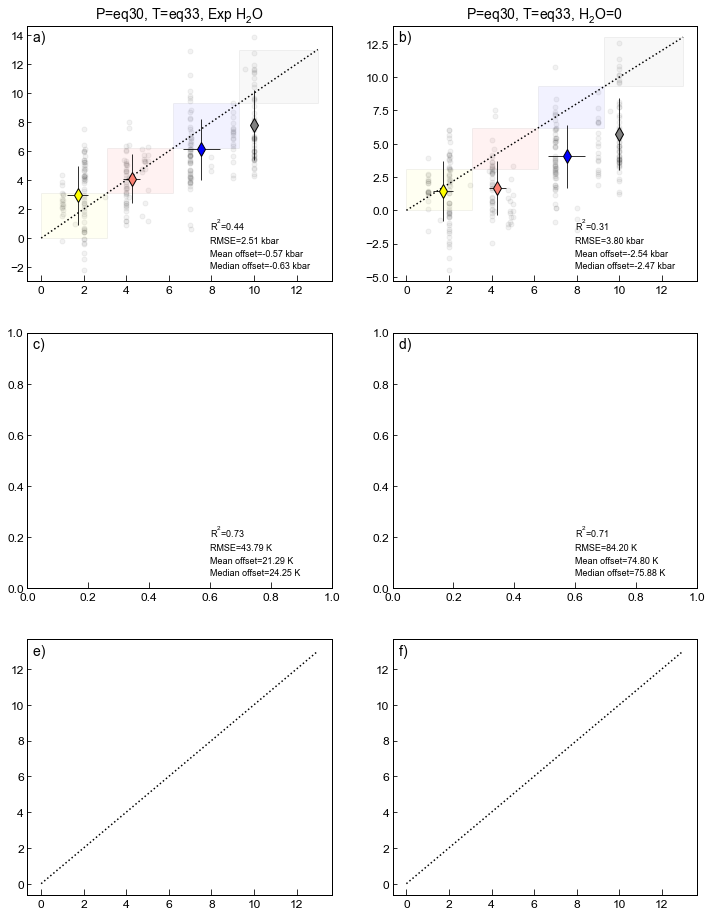

In [12]:
# model_H=y_30_T33
# model_noH=y_30_T33_noH
# str_H=str('P=eq30, T=eq33, Exp H$_2$O')
# str_noH=str('P=eq30, T=eq33, H$_2$O=0')
# # Pressure from experiments for axes ax1-a4
# y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
# Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="3033");

# y2=model_noH['P_kbar_calc'] # y axis, ax1 - Known H2O, 
# Tukey2=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="3033");


# Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_H)
# Eq_reg_av2=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_noH)


# y5=model_H['T_K_calc']
# y6=model_noH['T_K_calc']
# vals=np.array([3.1, 6.2, 9.3, 13])
# import matplotlib.patches as patches




vmax=10

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)

model_H=y_30_T33
model_noH=y_30_T33_noH
model_H_Eq=Eq_30_T33
model_noH_Eq=Eq_30_T33_noH
model_H_EqT=TEq_30_T33
model_noH_EqT=TEq_30_T33_noH



model_H_sigma=model_H_Eq['RMSE']
model_H_RMSE=model_H_Eq['RMSE']
model_noH_RMSE=model_noH_Eq['RMSE']

str_H=str('P=eq30, T=eq33, Exp H$_2$O')
str_noH=str('P=eq30, T=eq33, H$_2$O=0')
# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="3033");

y2=model_noH['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey2=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="3033");


Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_H)
Eq_reg_av2=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_noH)


y5=model_H['T_K_calc']
y6=model_noH['T_K_calc']
vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax2), (ax5, ax6), (ax3, ax4)) = plt.subplots(3, 2, figsize = (12,16))
ax1.plot([0, 13], [0, 13], ':k')
ax2.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')
ax4.plot([0, 13], [0, 13], ':k')



ax1.set_title(str_H)
ax2.set_title(str_noH)
ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax2.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("e) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax4.annotate("f) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax5.annotate("c) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax6.annotate("d) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_noH_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_noH_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_noH_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_noH_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax5.annotate("R$^{2}$="+str(model_H_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE="+str(model_H_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax5.annotate("Mean offset="+str(model_H_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax5.annotate("Median offset="+str(model_H_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax6.annotate("R$^{2}$="+str(model_noH_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax6.annotate("RMSE="+str(model_noH_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax6.annotate("Mean offset="+str(model_noH_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax6.annotate("Median offset="+str(model_noH_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax2.add_patch(rectU2)
ax2.add_patch(rectM2)
ax2.add_patch(rectL2)
ax2.add_patch(rectMo2)



ax2.plot(x, y2, 'ok', alpha=0.05, zorder=0, ms=5)
ax2.errorbar(Tukey2['X_Av'].iloc[0], Tukey2['Y_Av'].iloc[0], xerr=Tukey2['X_std'].iloc[0], yerr=Tukey2['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[1], Tukey2['Y_Av'].iloc[1], xerr=Tukey2['X_std'].iloc[1], yerr=Tukey2['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[2], Tukey2['Y_Av'].iloc[2], xerr=Tukey2['X_std'].iloc[2], yerr=Tukey2['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[3], Tukey2['Y_Av'].iloc[3], xerr=Tukey2['X_std'].iloc[3], yerr=Tukey2['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)
ax4.fill_between([0, 13],[0+model_noH_RMSE, 13+model_noH_RMSE], [0-model_noH_RMSE, 13-model_noH_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_Calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_Calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3)

ax4.errorbar(Eq_reg_av2['Mean_Pressure_Exp'], Eq_reg_av2['Mean_Median_P_kbar_Calc'],  yerr= Eq_reg_av2['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)


s=ax4.scatter(Eq_reg_av2['Mean_Pressure_Exp'], 
            Eq_reg_av2['Mean_Median_P_kbar_Calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av2['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax4)


ax5.plot(xT, y5, 'ok', mfc='grey')
ax6.plot(xT, y6, 'ok', mfc='grey')
ax5.plot([1100, 1550], [1050, 1550], ':k')
ax6.plot([1110, 1550], [1050, 1550], ':k')

ax1.set_ylabel('Calculated P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')
ax4.set_ylabel('Av. Calculated P (kbar)')
ax5.set_ylabel('Calculated T (K)')
ax6.set_ylabel('Calculated T (K)')

ax1.set_xlabel('Experimental P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax5.set_xlabel('Experimental T (K)')
ax6.set_xlabel('Experimental T (K)')


fig.savefig(r'../Calibration_Datasets/Amp_Liq_Eq30_33.png', dpi=100)

#C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\Calibration_Datasets

## Figure for equation P=31, T=33

In [ ]:
# model_H=y_31_T33
# model_noH=y_31_T33_noH
# str_H=str('P=eq31, T=eq33, Exp H$_2$O')
# str_noH=str('P=eq31, T=eq33, H$_2$O=0')
# # Pressure from experiments for axes ax1-a4
# y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
# Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="3133");

# y2=model_noH['P_kbar_calc'] # y axis, ax1 - Known H2O, 
# Tukey2=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="3133");


# Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_H)
# Eq_reg_av2=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_noH)


# y5=model_H['T_K_calc']
# y6=model_noH['T_K_calc']
# vals=np.array([3.1, 6.2, 9.3, 13])
# import matplotlib.patches as patches




vmax=10

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)

model_H=y_31_T33
model_noH=y_31_T33_noH
model_H_Eq=Eq_31_T33
model_noH_Eq=Eq_31_T33_noH
model_H_EqT=TEq_31_T33
model_noH_EqT=TEq_31_T33_noH



model_H_sigma=model_H_Eq['RMSE']
model_H_RMSE=model_H_Eq['RMSE']
model_noH_RMSE=model_noH_Eq['RMSE']

str_H=str('P=eq31, T=eq33, Exp H$_2$O')
str_noH=str('P=eq31, T=eq33, H$_2$O=0')
# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="3133");

y2=model_noH['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey2=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="3133");


Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_H)
Eq_reg_av2=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_noH)


y5=model_H['T_K_calc']
y6=model_noH['T_K_calc']
vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax2), (ax5, ax6), (ax3, ax4)) = plt.subplots(3, 2, figsize = (12,16))
ax1.plot([0, 13], [0, 13], ':k')
ax2.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')
ax4.plot([0, 13], [0, 13], ':k')



ax1.set_title(str_H)
ax2.set_title(str_noH)
ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax2.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("e) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax4.annotate("f) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax5.annotate("c) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax6.annotate("d) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_noH_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_noH_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_noH_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_noH_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax5.annotate("R$^{2}$="+str(model_H_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE="+str(model_H_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax5.annotate("Mean offset="+str(model_H_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax5.annotate("Median offset="+str(model_H_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax6.annotate("R$^{2}$="+str(model_noH_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax6.annotate("RMSE="+str(model_noH_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax6.annotate("Mean offset="+str(model_noH_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax6.annotate("Median offset="+str(model_noH_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax2.add_patch(rectU2)
ax2.add_patch(rectM2)
ax2.add_patch(rectL2)
ax2.add_patch(rectMo2)



ax2.plot(x, y2, 'ok', alpha=0.05, zorder=0, ms=5)
ax2.errorbar(Tukey2['X_Av'].iloc[0], Tukey2['Y_Av'].iloc[0], xerr=Tukey2['X_std'].iloc[0], yerr=Tukey2['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[1], Tukey2['Y_Av'].iloc[1], xerr=Tukey2['X_std'].iloc[1], yerr=Tukey2['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[2], Tukey2['Y_Av'].iloc[2], xerr=Tukey2['X_std'].iloc[2], yerr=Tukey2['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[3], Tukey2['Y_Av'].iloc[3], xerr=Tukey2['X_std'].iloc[3], yerr=Tukey2['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)
ax4.fill_between([0, 13],[0+model_noH_RMSE, 13+model_noH_RMSE], [0-model_noH_RMSE, 13-model_noH_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_Calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_Calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3)

ax4.errorbar(Eq_reg_av2['Mean_Pressure_Exp'], Eq_reg_av2['Mean_Median_P_kbar_Calc'],  yerr= Eq_reg_av2['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)


s=ax4.scatter(Eq_reg_av2['Mean_Pressure_Exp'], 
            Eq_reg_av2['Mean_Median_P_kbar_Calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av2['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax4)


ax5.plot(xT, y5, 'ok', mfc='grey')
ax6.plot(xT, y6, 'ok', mfc='grey')
ax5.plot([1100, 1550], [1050, 1550], ':k')
ax6.plot([1110, 1550], [1050, 1550], ':k')

ax1.set_ylabel('Calculated P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')
ax4.set_ylabel('Av. Calculated P (kbar)')
ax5.set_ylabel('Calculated T (K)')
ax6.set_ylabel('Calculated T (K)')

ax1.set_xlabel('Experimental P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax5.set_xlabel('Experimental T (K)')
ax6.set_xlabel('Experimental T (K)')


fig.savefig(r'../Calibration_Datasets/Amp_Liq_Eq31_33.png', dpi=100)

#C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\Calibration_Datasets

## Equation 33 and Neave 2017

In [ ]:
# model_H=y_N17_T33
# model_noH=y_N17_T33_noH
# str_H=str('P=eqN17, T=eq33, Exp H$_2$O')
# str_noH=str('P=eqN17, T=eq33, H$_2$O=0')
# # Pressure from experiments for axes ax1-a4
# y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
# Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="N1733");

# y2=model_noH['P_kbar_calc'] # y axis, ax1 - Known H2O, 
# Tukey2=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="N1733");


# Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_H)
# Eq_reg_av2=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_noH)


# y5=model_H['T_K_calc']
# y6=model_noH['T_K_calc']
# vals=np.array([3.1, 6.2, 9.3, 13])
# import matplotlib.patches as patches




vmax=10

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)

model_H=y_N17_T33
model_noH=y_N17_T33_noH
model_H_Eq=Eq_N17_T33
model_noH_Eq=Eq_N17_T33_noH
model_H_EqT=TEq_N17_T33
model_noH_EqT=TEq_N17_T33_noH



model_H_sigma=model_H_Eq['RMSE']
model_H_RMSE=model_H_Eq['RMSE']
model_noH_RMSE=model_noH_Eq['RMSE']

str_H=str('P=eqN17, T=eq33, Exp H$_2$O')
str_noH=str('P=eqN17, T=eq33, H$_2$O=0')
# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="N1733");

y2=model_noH['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey2=pt.Tukey_Plot_np_values(Amp_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="N1733");


Eq_reg_av1=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_H)
Eq_reg_av2=pt.Experimental_av_values(Amp_Glass.loc[Press_new&Eq_Mask], model_noH)


y5=model_H['T_K_calc']
y6=model_noH['T_K_calc']
vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax2), (ax5, ax6), (ax3, ax4)) = plt.subplots(3, 2, figsize = (12,16))
ax1.plot([0, 13], [0, 13], ':k')
ax2.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')
ax4.plot([0, 13], [0, 13], ':k')



ax1.set_title(str_H)
ax2.set_title(str_noH)
ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax2.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("e) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax4.annotate("f) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax5.annotate("c) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax6.annotate("d) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_noH_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_noH_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_noH_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_noH_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax5.annotate("R$^{2}$="+str(model_H_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE="+str(model_H_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax5.annotate("Mean offset="+str(model_H_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax5.annotate("Median offset="+str(model_H_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax6.annotate("R$^{2}$="+str(model_noH_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax6.annotate("RMSE="+str(model_noH_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax6.annotate("Mean offset="+str(model_noH_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax6.annotate("Median offset="+str(model_noH_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax2.add_patch(rectU2)
ax2.add_patch(rectM2)
ax2.add_patch(rectL2)
ax2.add_patch(rectMo2)



ax2.plot(x, y2, 'ok', alpha=0.05, zorder=0, ms=5)
ax2.errorbar(Tukey2['X_Av'].iloc[0], Tukey2['Y_Av'].iloc[0], xerr=Tukey2['X_std'].iloc[0], yerr=Tukey2['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[1], Tukey2['Y_Av'].iloc[1], xerr=Tukey2['X_std'].iloc[1], yerr=Tukey2['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[2], Tukey2['Y_Av'].iloc[2], xerr=Tukey2['X_std'].iloc[2], yerr=Tukey2['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[3], Tukey2['Y_Av'].iloc[3], xerr=Tukey2['X_std'].iloc[3], yerr=Tukey2['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)
ax4.fill_between([0, 13],[0+model_noH_RMSE, 13+model_noH_RMSE], [0-model_noH_RMSE, 13-model_noH_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_Calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_Calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3)

ax4.errorbar(Eq_reg_av2['Mean_Pressure_Exp'], Eq_reg_av2['Mean_Median_P_kbar_Calc'],  yerr= Eq_reg_av2['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)


s=ax4.scatter(Eq_reg_av2['Mean_Pressure_Exp'], 
            Eq_reg_av2['Mean_Median_P_kbar_Calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av2['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax4)


ax5.plot(xT, y5, 'ok', mfc='grey')
ax6.plot(xT, y6, 'ok', mfc='grey')
ax5.plot([1100, 1550], [1050, 1550], ':k')
ax6.plot([1110, 1550], [1050, 1550], ':k')

ax1.set_ylabel('Calculated P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')
ax4.set_ylabel('Av. Calculated P (kbar)')
ax5.set_ylabel('Calculated T (K)')
ax6.set_ylabel('Calculated T (K)')

ax1.set_xlabel('Experimental P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax5.set_xlabel('Experimental T (K)')
ax6.set_xlabel('Experimental T (K)')


fig.savefig(r'../Calibration_Datasets/Amp_Liq_EqN17_33.png', dpi=100)

#C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\Calibration_Datasets

## Equilibrium tests

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


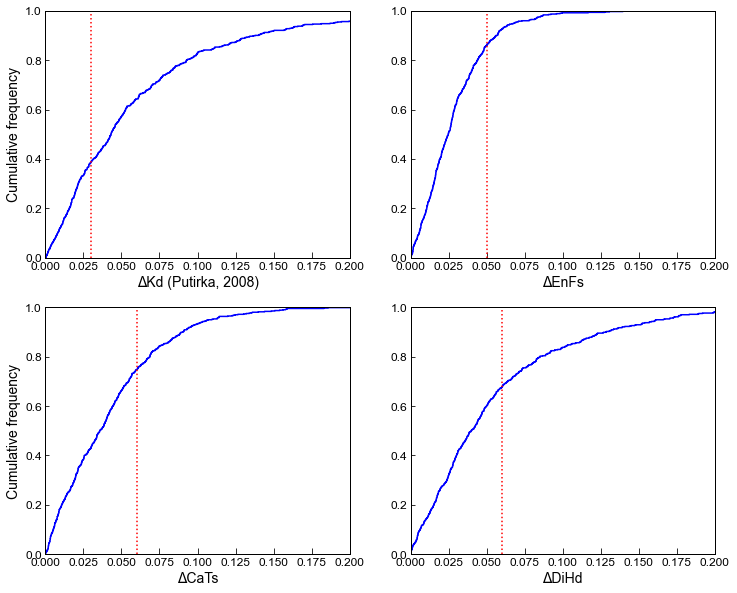

In [13]:
b=1.5
Kd_Sorted=np.sort(Eq_tests['Delta_Kd_Put2008'])
fig, ((ax1, ax2),  (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,10))
ax1.step(np.concatenate([Kd_Sorted, Kd_Sorted[[-1]]]),
         np.arange(Kd_Sorted.size+1)/Kd_Sorted.size, color='blue', linewidth=b)
ax1.plot([0.03, 0.03], [0, 1], ':r')
ax1.set_xlim([0, 0.2])
ax1.set_ylim([0, 1])

EnFs_Sorted=np.sort(Eq_tests['Delta_EnFs'])
ax2.step(np.concatenate([EnFs_Sorted, EnFs_Sorted[[-1]]]),
         np.arange(EnFs_Sorted.size+1)/EnFs_Sorted.size, color='blue', linewidth=b)
ax2.plot([0.05, 0.05], [0, 1], ':r')
ax2.set_xlim([0, 0.2])
ax2.set_ylim([0, 1])

CaTs_Sorted=np.sort(Eq_tests['Delta_CaTs'])
ax3.step(np.concatenate([CaTs_Sorted, CaTs_Sorted[[-1]]]),
         np.arange(CaTs_Sorted.size+1)/CaTs_Sorted.size, color='blue', linewidth=b)
ax3.plot([0.06, 0.06], [0, 1], ':r')
ax3.set_xlim([0, 0.2])
ax3.set_ylim([0, 1])

DiHd_Sorted=np.sort(Eq_tests['Delta_DiHd'])
ax4.step(np.concatenate([DiHd_Sorted, DiHd_Sorted[[-1]]]),
         np.arange(DiHd_Sorted.size+1)/DiHd_Sorted.size, color='blue', linewidth=b)
ax4.plot([0.06, 0.06], [0, 1], ':r')
ax4.set_xlim([0, 0.2])
ax4.set_ylim([0, 1])

ax1.set_ylabel('Cumulative frequency')
ax3.set_ylabel('Cumulative frequency')

ax1.set_xlabel('ΔKd (Putirka, 2008)')
ax2.set_xlabel('ΔEnFs')
ax3.set_xlabel('ΔCaTs')
ax4.set_xlabel('ΔDiHd')
fig.savefig(r'../Calibration_Datasets/EquilibriumTests-Amp-Liq.png', dpi=300)

## What about water

In [60]:
Test_input_All=out['my_input'].loc[Press_new&Eq_Mask]
VBD_cal_mask=Test_input_All['H2O_Liq_Method'].str.startswith('VBD_GSC')
VBD_cal_mask=VBD_cal_mask.fillna(False)

VBD_mask=Test_input_All['H2O_Liq_Method'].str.startswith('VBD')
VBD_mask=VBD_mask.fillna(False)
FTIR_mask=Test_input_All['H2O_Liq_Method'].str.startswith('FTIR')
FTIR_mask=FTIR_mask.fillna(False)
SIMS_mask=Test_input_All['H2O_Liq_Method'].str.startswith('SIMS')
SIMS_mask=SIMS_mask.fillna(False)
Raman_mask=Test_input_All['H2O_Liq_Method'].str.startswith('Raman')
Raman_mask=Raman_mask.fillna(False)
Sol_mask=Test_input_All['H2O_Liq_Method'].str.startswith('Sol')
Sol_mask=Sol_mask.fillna(False)
balance_mask=Test_input_All['H2O_Liq_Method'].str.startswith('balance')
balance_mask=balance_mask.fillna(False)

added_mask=Test_input_All['H2O_Liq_Method'].str.startswith('added')
added_mask=added_mask.fillna(False)
Quantmethod1=FTIR_mask|SIMS_mask|Raman_mask

Quantmethod=VBD_cal_mask|FTIR_mask|SIMS_mask|Raman_mask
NonQuantmethod=(VBD_mask&~VBD_cal_mask)|balance_mask|added_mask
NoH2O=Test_input_All['H2O_Liq_Method']==0
NoH2O=NoH2O.fillna(False)


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


R2=0.11


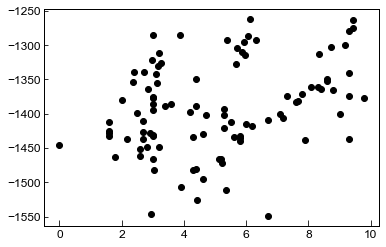

In [61]:
y=y_30_T33_noH['T_K_calc']
Disc=x-y
stats=pt.calculate_R2(Test_input_All['H2O_Liq'].loc[Quantmethod1], Disc.loc[Quantmethod1])
print("R2="+stats['R2'])
plt.plot(Test_input_All['H2O_Liq'].loc[Quantmethod1], Disc.loc[Quantmethod1], 'ok')

R2=0.25


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


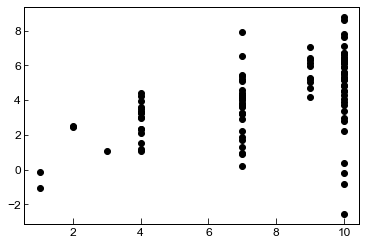

In [62]:
y=y_30_T33_noH['P_kbar_calc']
Disc=x-y
str1="P_kbar_x"
stats=pt.calculate_R2(Test_input_All[str1].loc[Quantmethod1], Disc.loc[Quantmethod1])
print("R2="+stats['R2'])
plt.plot(Test_input_All[str1].loc[Quantmethod1], Disc.loc[Quantmethod1], 'ok')

In [50]:
Test_input_All['H2O_Liq_Method'].loc[Quantmethod1]

257         FTIR
258         FTIR
259         FTIR
260         FTIR
261         FTIR
         ...    
491    H2O_Raman
492    H2O_Raman
493    H2O_Raman
512         FTIR
513         FTIR
Name: H2O_Liq_Method, Length: 100, dtype: object